### Standard & Poor's (S&P 500 index):
#### Preprocessing.
#### EDA

### Importing Libraries 

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np # for numerical operations
import seaborn as sns #visualisation
import matplotlib.pyplot as plt # visualization
%matplotlib inline 
import matplotlib.ticker as ticker # Library to customize ticks
from datetime import date
import holidays
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings # filter warnings
warnings.filterwarnings('ignore')

The selected source for the experiment is Yahoo Finance, through the integration of the yfinance library and jupyter.
- Timeframe selected for the project is 10 years (2014-2023).
- The frequency to be used is business day, the selection is because the market is open during these days.
- The period include real world scenarios such as Brexit in 2016 and Covid-19.
- Is also believed that in 10 years of data, volatility and trends are present in the market.

The last trading day 2013 is also being imported due to critical importante in some of the approaches.

#### Importing dataset from yahoo finance (yfinance library).

In [2]:
# Defines ticker symbol for S&P 500 index.
ticker_symbol = "^GSPC"

# Fetch historical data.
sp500_data = yf.download(ticker_symbol, start="2013-12-31", end="2023-12-31")

[*********************100%%**********************]  1 of 1 completed


The command display provides an overview of the dataset: 
- Head: First five rows.
- Tail: Last five rows.
- Shape: Number of rows and columns.

#### Data PreProcessing 

In [3]:
display(sp500_data)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-31,1842.609985,1849.439941,1842.410034,1848.359985,1848.359985,2312840000
2014-01-02,1845.859985,1845.859985,1827.739990,1831.979980,1831.979980,3080600000
2014-01-03,1833.209961,1838.239990,1829.130005,1831.369995,1831.369995,2774270000
2014-01-06,1832.310059,1837.160034,1823.729980,1826.770020,1826.770020,3294850000
2014-01-07,1828.709961,1840.099976,1828.709961,1837.880005,1837.880005,3511750000
...,...,...,...,...,...,...
2023-12-22,4753.919922,4772.939941,4736.770020,4754.629883,4754.629883,3046770000
2023-12-26,4758.859863,4784.720215,4758.450195,4774.750000,4774.750000,2513910000
2023-12-27,4773.450195,4785.390137,4768.899902,4781.580078,4781.580078,2748450000


- The dataset is composed by 2517 rows and 6 features. In this present project the Close feature will be the focus of the study, representing the closing index at the end of the trading day.

In [4]:
# Check for missing values
missing_values = sp500_data.isnull().sum()

# Print the number of missing values for each column
print("Missing values:")
print(missing_values)

Missing values:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


- The S&P 500 index dataset imported from yfinance is composed by 2517 observations and 6 features.

The dataset does not present outliers at this point. However, by observind the first five rows it is noticeable that there are not five days in a row (business days), therefore holidays on weekdays might have been excluded from the set due to no trading activity.

In [5]:
# Define start and end dates - 10 years period.
start_date = '2013-12-31'
end_date = '2023-12-31'

# Generate business days between the start and end dates
business_days = pd.bdate_range(start=start_date, end=end_date)

# Get the total number of business days
total_business_days = len(business_days)

print("Total number of business days between", start_date, "and", end_date, "is:", total_business_days)

Total number of business days between 2013-12-31 and 2023-12-31 is: 2609


The calendar within the selected period has 2609 business days, having more days than the number of rows in the dataset, providing more evidence for the exclusion of holidays on weekdays (no trading). 
- weekends could be considered noise (market is closed).
- by analysing just the business days it can be focused on days that the market is actually open, reducing the amount of noise which could affect the model performance. 

<b> After the models have being implemented a second round of models can be applied using daily frequency, which will include all the seven days (addition not only of holidays on weekdays, but also, weekends).

- Check the performance of the models and compare what frequency techniques performs better or worse. In addition, check if the introduction of noise (handling missing values) affected the models and justify even deeper the choice for the frequency.

In [6]:
# Defining start and end dates (ten years timeframe)
start_date = date(2013, 12, 31)
end_date = date(2023, 12, 31)

# Get all US business holidays between start_date and end_date
us_holidays = holidays.US()

# Create a complete date range covering all weekdays
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# Filter out holidays that fall on weekdays
us_business_holidays = [holiday for holiday in us_holidays.keys() if holiday in all_weekdays]

# Filter out weekends
weekdays = all_weekdays.difference(pd.to_datetime(us_business_holidays))

# Create DataFrame with all weekdays
weekdays_df = pd.DataFrame({'Date': weekdays})

# Set 'Date' column as index
weekdays_df.set_index('Date', inplace=True)

# Create DataFrame with S&P 500 data
df = pd.DataFrame(sp500_data, columns=['Close'])

# Merge the two DataFrames on the index
merged_df = weekdays_df.merge(df, left_index=True, right_index=True, how='left')

# Convert back to Series
df_BF = merged_df

# Display the updated Series
display(df_BF)

,Close
Date,
2013-12-31,1848.359985
2014-01-01,NaN
2014-01-02,1831.979980
2014-01-03,1831.369995
2014-01-06,1826.770020
...,...
2023-12-25,NaN
2023-12-26,4774.750000
2023-12-27,4781.580078


- After the inputation of the holidays the number of entries match with the total (2608), which was generated by the previous code.
- The inputed missing days were added with NaN values, which will have to be addressed. 

In [7]:
# Check for missing values
missing_values = df_BF.isnull().sum()

# Print the number of missing values for each column
print("Missing values:")
print(missing_values)

Missing values:
Close    92
dtype: int64


In [8]:
# Checking if there's any consecutive missing values in the Close indexes. 
# Converting NaN checks to integers (1 for True, 0 for False).
nan_series = df_BF['Close'].isna().astype(int)

# Rolling window size 3 and sum to identify consecutive NaNs
consecutive_nans = nan_series.rolling(window=3).sum() == 3

# Check for any occurrence of more than two consecutive NaNs
has_consecutive_nans = consecutive_nans.any()

print(f"Two consecutive NaNs in 'Close' column? {has_consecutive_nans}")


Two consecutive NaNs in 'Close' column? False


- Since there are no consecutive missing values, linear regression methods might not be the best option.

During this 10 years period, the market had 92 holidays on business days.
<b> Assuming that technically the close value of the last trading day will maintain untill the following trading day.

Since the main focus of the project is the Close column, many options can be applied to fill the missing values (holidays) and each one of them having a trade off of pros and cons. Techniques using the next opening to fill the previous, linear regression and others (depending on the performance).
The selected approach to handle the missing values is the foward fill and the reasons relies on: 
- The S&P500 index does not suffers any change when the market is closed;
- It can reduce the amount of noise by not adding artificial data;
- It represents more accurate real-world scenario;

The rationales were thought out to perform time-series analysis (forecasting) with the dataset. 

Other options such as back-fill using the open index of the next day could be considered. On one hand can present events that might impact the stock market, on the other hand it can introduce bias to the models, by "seing" future data. 

In [9]:
# Forward fill NaN values in the 'Close' column.
df_BF.fillna(method='ffill', inplace=True)

# Display the updated DataFrame with forward filled values.
display(df_BF)

,Close
Date,
2013-12-31,1848.359985
2014-01-01,1848.359985
2014-01-02,1831.979980
2014-01-03,1831.369995
2014-01-06,1826.770020
...,...
2023-12-25,4754.629883
2023-12-26,4774.750000
2023-12-27,4781.580078


In [10]:
# Check for missing values
missing_values = df_BF.isnull().sum()

# Print the number of missing values for each column
print("Missing values:")
print(missing_values)

Missing values:
Close    0
dtype: int64


In [11]:
sp500_data['Close'].describe()

count    2517.000000
mean     3005.423258
std       901.454132
min      1741.890015
25%      2124.199951
50%      2798.030029
75%      3906.709961
max      4796.560059
Name: Close, dtype: float64

In [12]:
df_BF.describe()

,Close
count,2609.000000
mean,3005.472863
std,901.733128
min,1741.890015
25%,2124.199951
50%,2793.899902
75%,3902.620117
max,4796.560059


Looking at the statistical properties of the S&P500 data (withouy any imputations) and the df_BF (with imputations), it is observable that the properties barely changed, the biggest difference are in the 50% (-4.13) and 75% (-4.09). However, taking into consideration the scale the change is not significant. 

The statistical features of the imputed dataframe, the df_BF:
- The variable ranges from 1741.89 to 4796.56
- It has a mean (average) of 3005.92.
- The standard deviation is 901.62, and in the present context can be considered high because it represents almost 30% of the avg value, but also, taking into consideration the scale of the min and max values. 

Other imputation techniques can be applied later to check the results and implications of each approach to handle the missing values.

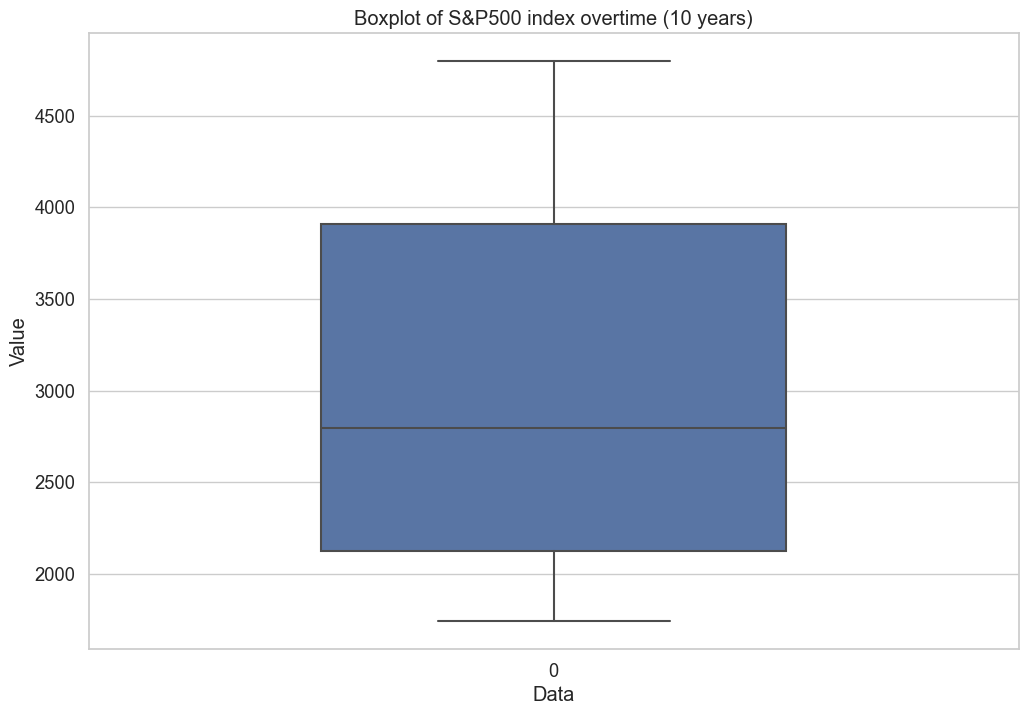

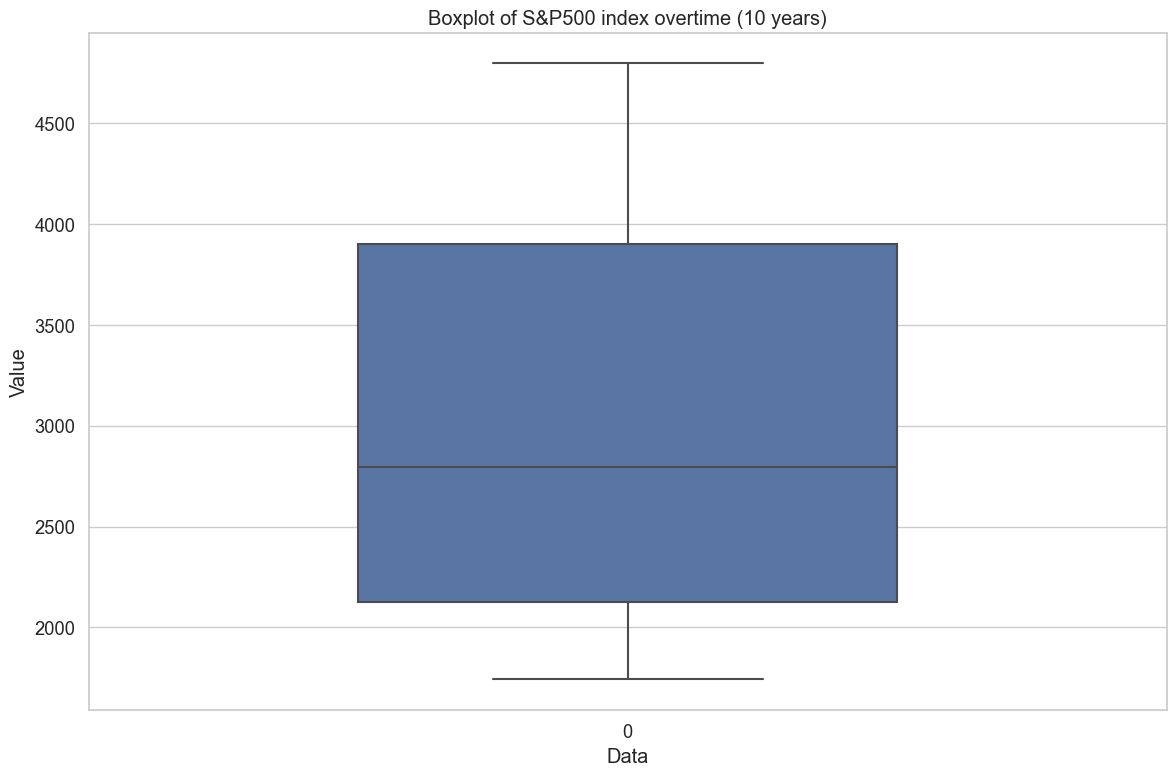

In [13]:
plt.figure(figsize=(12, 8)) # Set up the plot and adjust the figure size.
sns.set(style="whitegrid", font_scale=1.2) # Add a whitegrid in the backgound for clear visualization.
# Creates the boxplot with all the columns.
ax = sns.boxplot(data=sp500_data['Close'], width=0.5) # Sets the width to 0.5
 # Add labels and ha argument used to align the labels to the designated boxplot.
ax.set_xlabel('Data') # Adds x-axis label.
ax.set_ylabel('Value') # Adds y-axis label.
ax.set_title('Boxplot of S&P500 index overtime (10 years)') # Sets title to tle boxplot.

plt.figure(figsize=(12, 8)) # Set up the plot and adjust the figure size.
sns.set(style="whitegrid", font_scale=1.2) # Add a whitegrid in the backgound for clear visualization.
# Creates the boxplot with all the columns.
ax = sns.boxplot(data=df_BF['Close'], width=0.5) # Sets the width to 0.5
 # Add labels and ha argument used to align the labels to the designated boxplot.
ax.set_xlabel('Data') # Adds x-axis label.
ax.set_ylabel('Value') # Adds y-axis label.
ax.set_title('Boxplot of S&P500 index overtime (10 years)') # Sets title to tle boxplot.

plt.tight_layout() # Adjusts the layout.
plt.show() # Shows the plot.

- The .describe along with the boxplot shows that the mean is above the median indicating a skewness towards higher values.
- According to the boxplot, the close variable does not present any values outside of the skewers, which might indicate that outliers are not present. Although, tests can be performed after checking the distribution of the data.
- Also between the original dataset and with imputed "business days" barely suffered any changes when looking at the boxplots

### Distribution of Close index

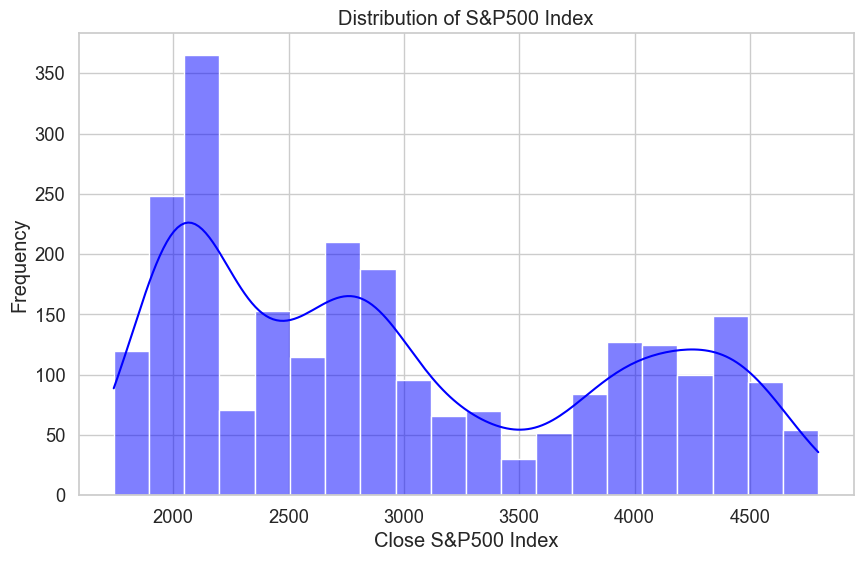

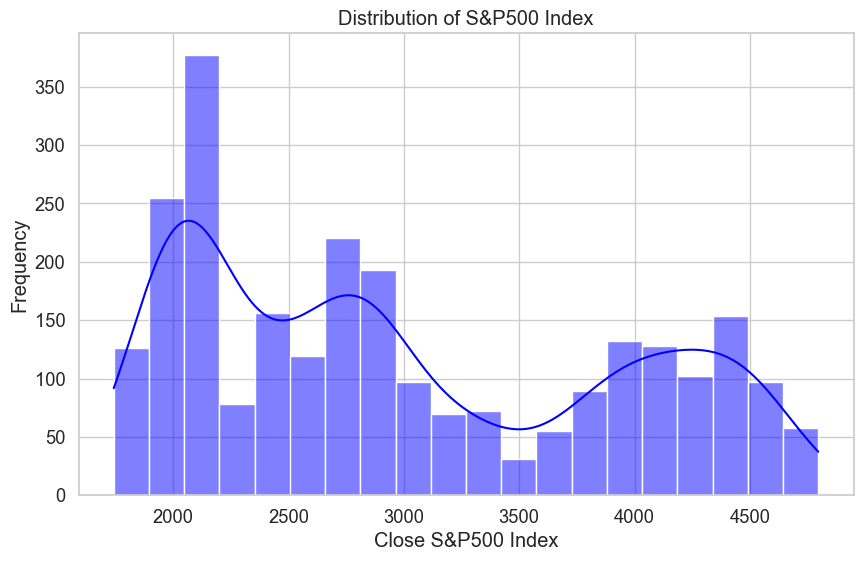

In [14]:
# Distribution plot of Close prices
plt.figure(figsize=(10, 6))
sns.histplot(sp500_data['Close'], bins=20, kde=True, color='blue')
plt.title('Distribution of S&P500 Index')
plt.xlabel('Close S&P500 Index')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_BF['Close'], bins=20, kde=True, color='blue')
plt.title('Distribution of S&P500 Index')
plt.xlabel('Close S&P500 Index')
plt.ylabel('Frequency')
plt.show()

- The distribution of the data has not change from the original to the inputted business days (holiday).
- The S&P 500 index presents a multimodal distribution of values, in its distribution plot and the KDE curve shows three different peaks. Despite trying different number of bins, multiple peaks were still present.

The assumption to be followed is that the data has a multimodal distribution. 

#### Outliers and Skewness

Based on the distribution, standard test such as IQR, MAD, Z-Score cannot be considered appropriate.
- The IQR method to identify outliers does not fit this case, because is indicated for unimodal distributions.
- Z-score, follows the same assumption as the IQR.
- The MAD, the three different peaks could indicate that are values clustered around them. Thus, this method could generate misleading results.

- Outliers will be also be analysed during the seasonal decompose stage. 

#### S&P 500 index overtime

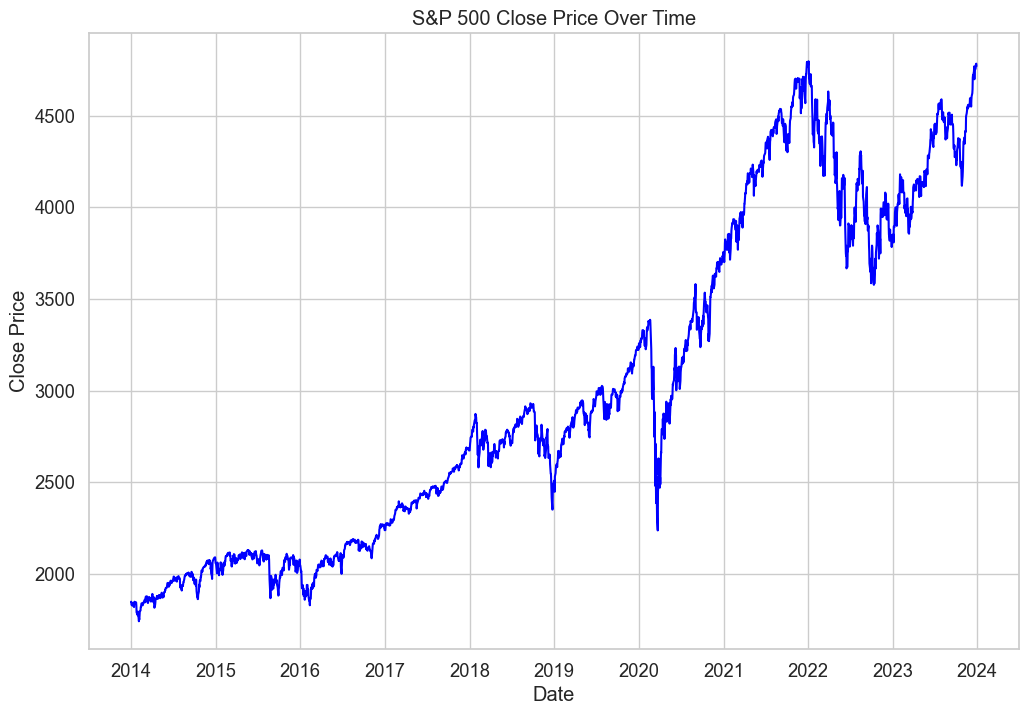

In [15]:
# Plotting
plt.figure(figsize=(12, 8))

# Time Series Plot of Close Price
plt.plot(df_BF.index, df_BF['Close'], color='blue')
plt.title('S&P 500 Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.show()

- The lineplot of the index overtime shows that has an upwards trend. More details will be explored in the seasonal decompose.

#### Seasonal Decompose at a different periods

Seasonal Decomposition with Period = 252


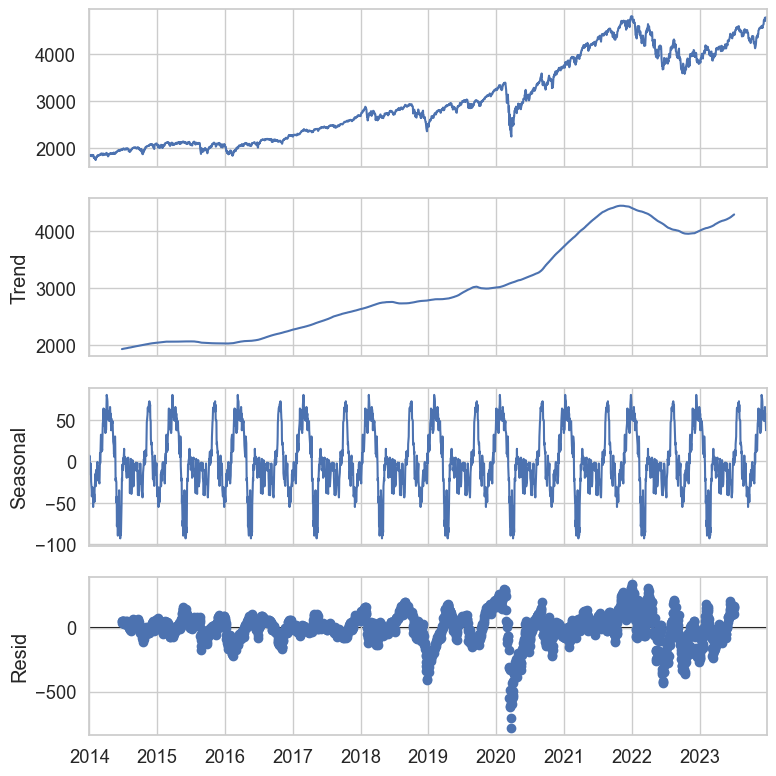

Seasonal Decomposition with Period = 126


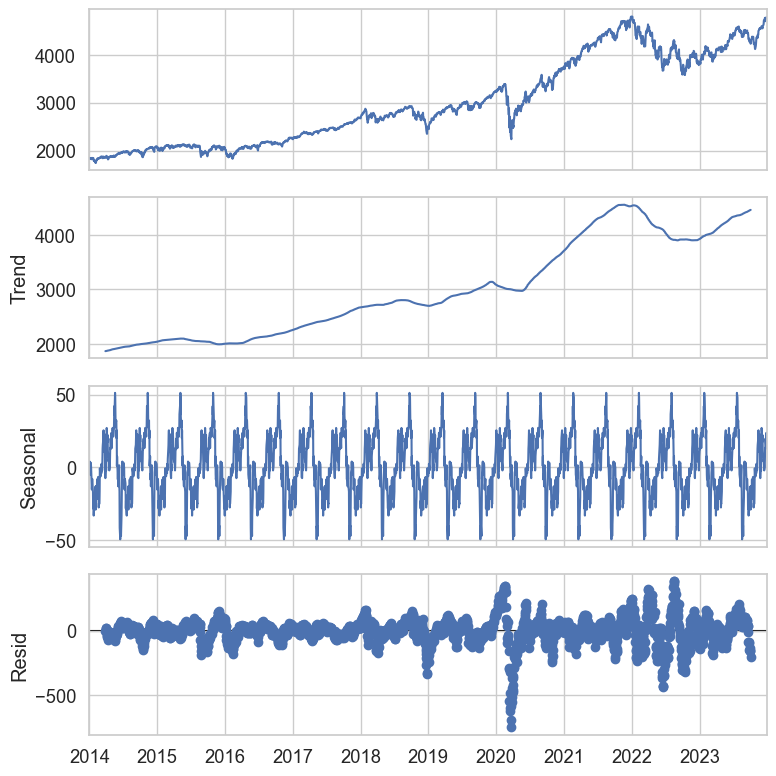

Seasonal Decomposition with Period = 63


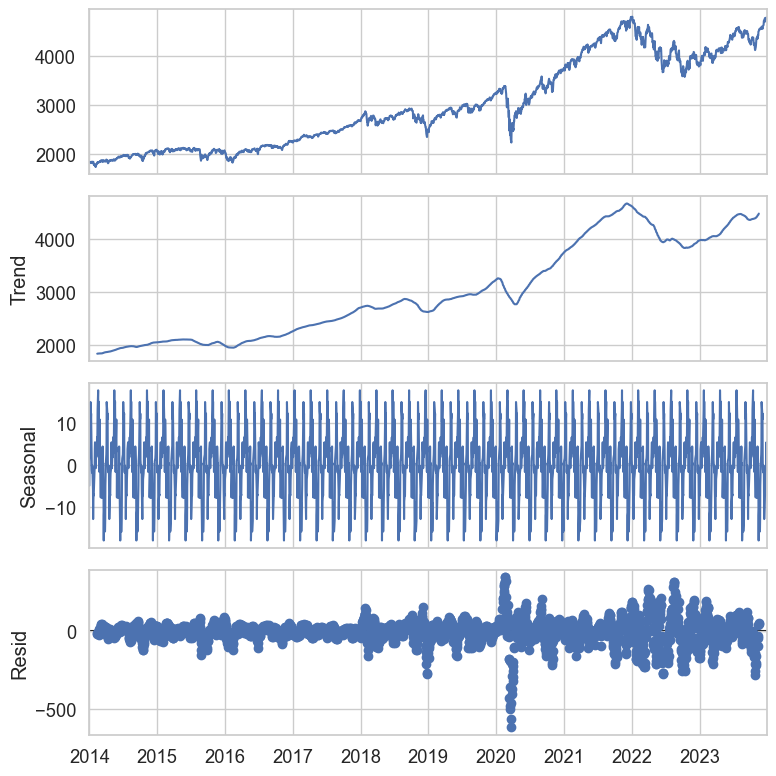

Seasonal Decomposition with Period = 21


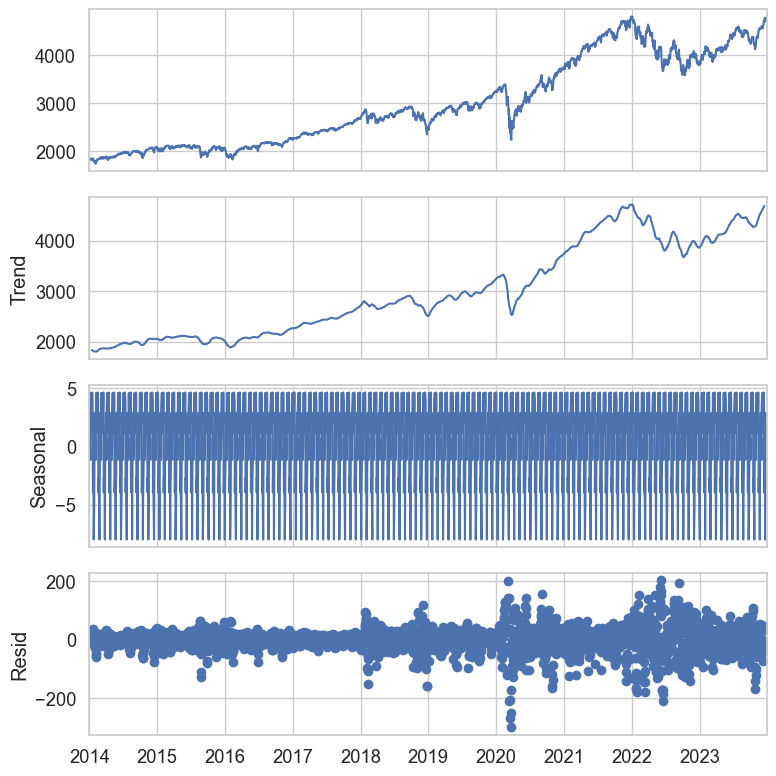

In [16]:
# Seasonal decompositions with different periods.
periods = [252, 126, 63, 21]  # Annual, Six months, Quartely, Monthly (assuming business days)
# Function to generate the plots for all periods.
for period in periods:
    decompositions = seasonal_decompose(df_BF, model='additive', period=period)

    # Plotting the components of the decomposition
    plt.rcParams.update({'figure.figsize': (8,8)})
    print(f"Seasonal Decomposition with Period = {period}")
    decompositions.plot()
    plt.show()

- By performing the seasonal decompose using different periods, all periods showed similiar trend (upwards) and seasonality. However, by lowering the period the number of residuals increased, which could indicate high complexity or non-linearity in the data.

Analysing the seasonal decomposition of different periods: 

- Trend: As observed in the lineplot, the index has an upward trend overtime.
- Seasonality: The plot shows that it has a pattern that repeats overtime.
- Residuals: The figure indicates that the data has a lot of noise, but no pattern was indentified.

Due to the results of the residual plot a deeper look into the noises/outliers will be performed, they present a big threat on time-series models performance. 

#### S&P 500 Seasonal Decompose Residual Analysis at different periods

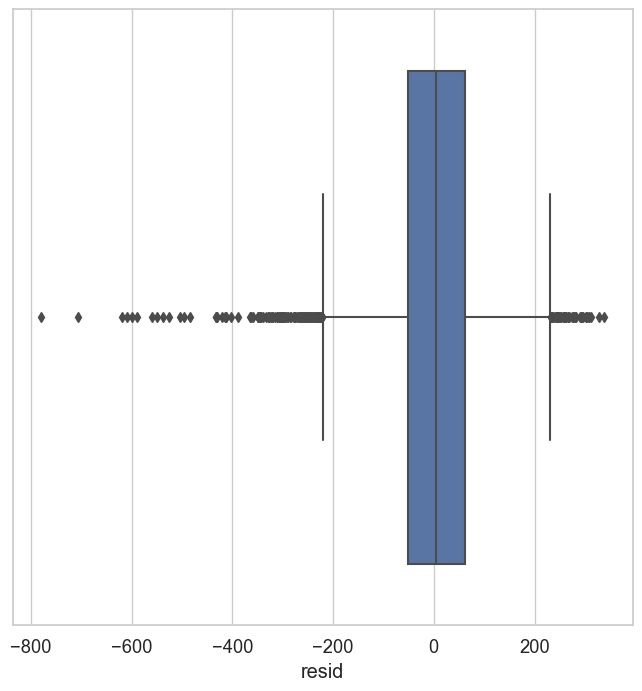

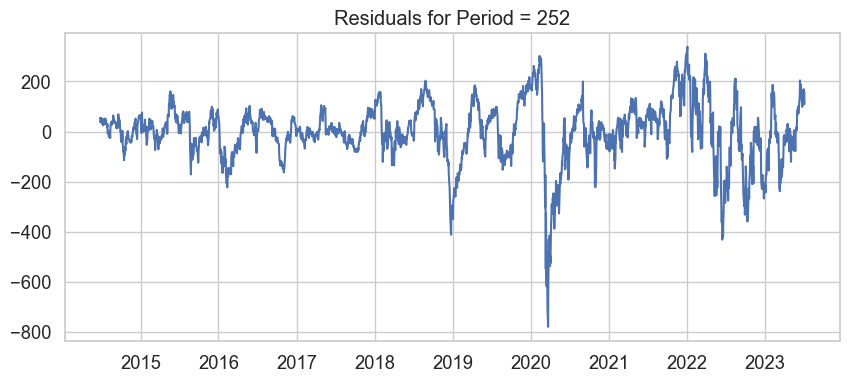

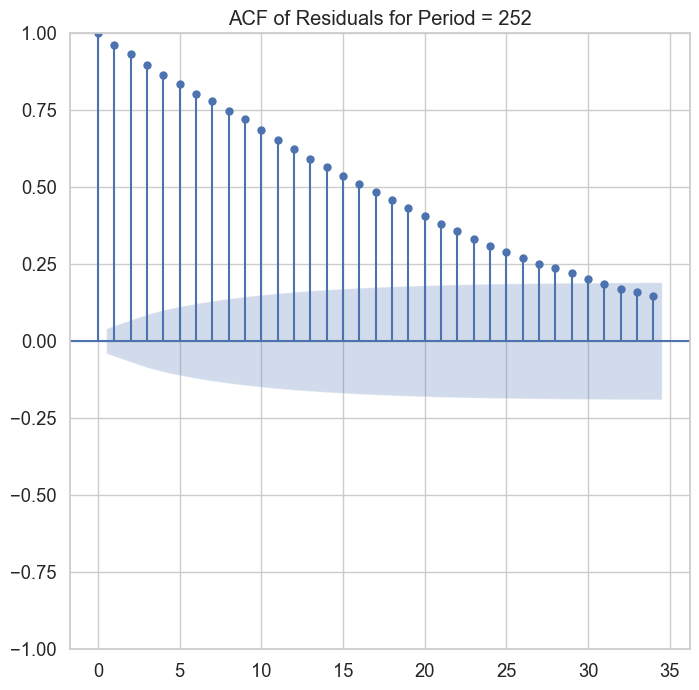

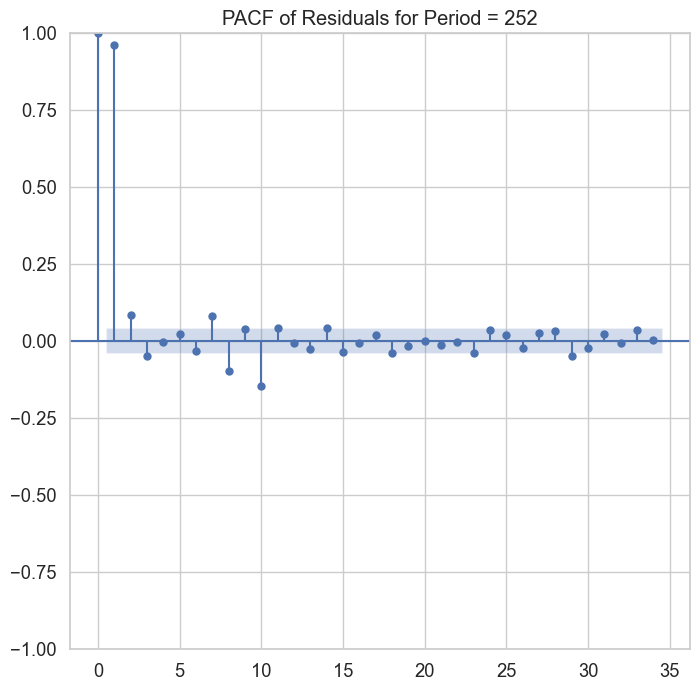

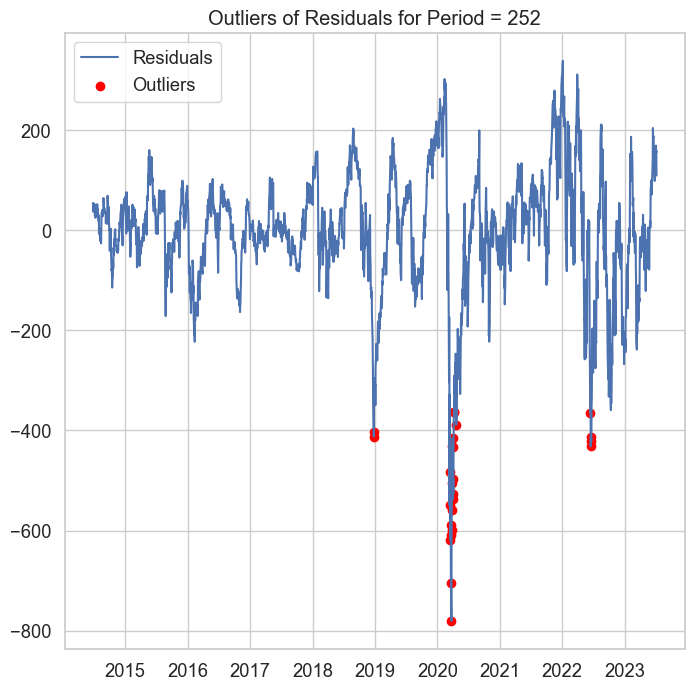

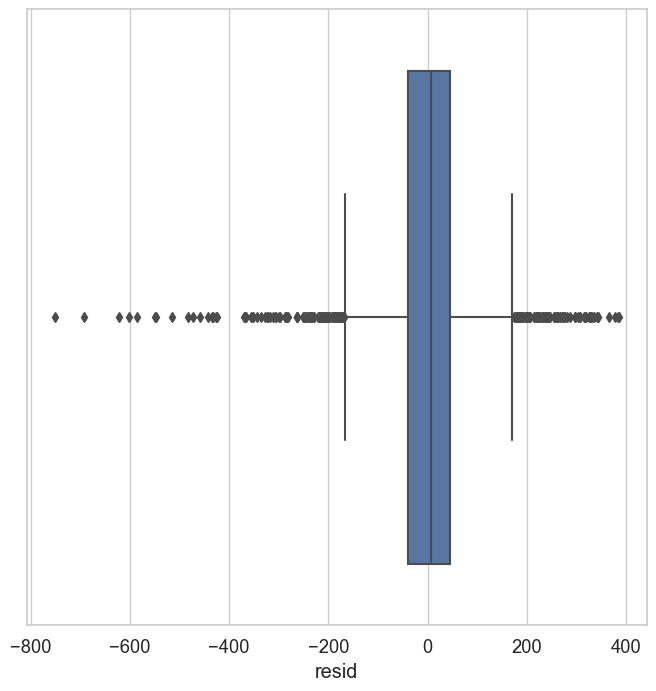

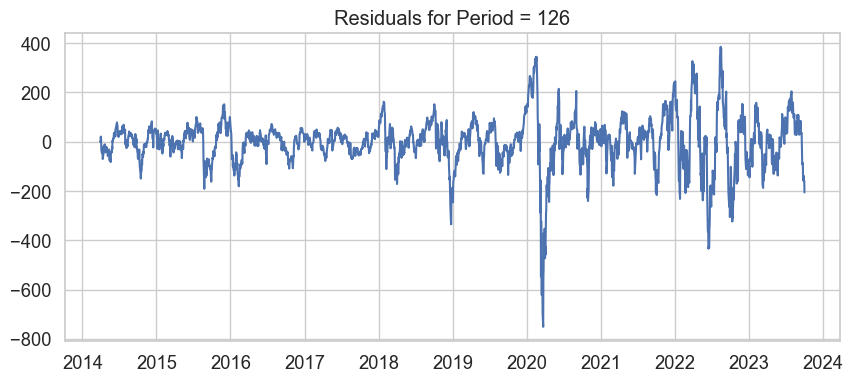

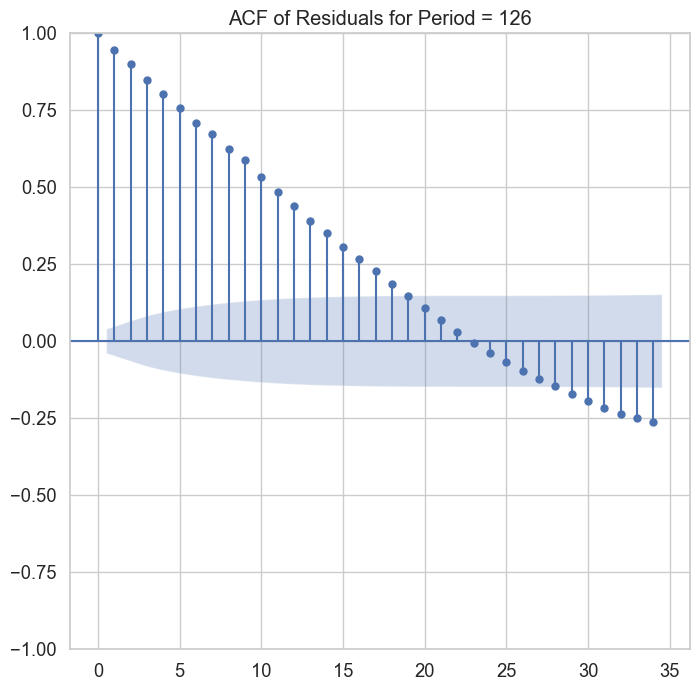

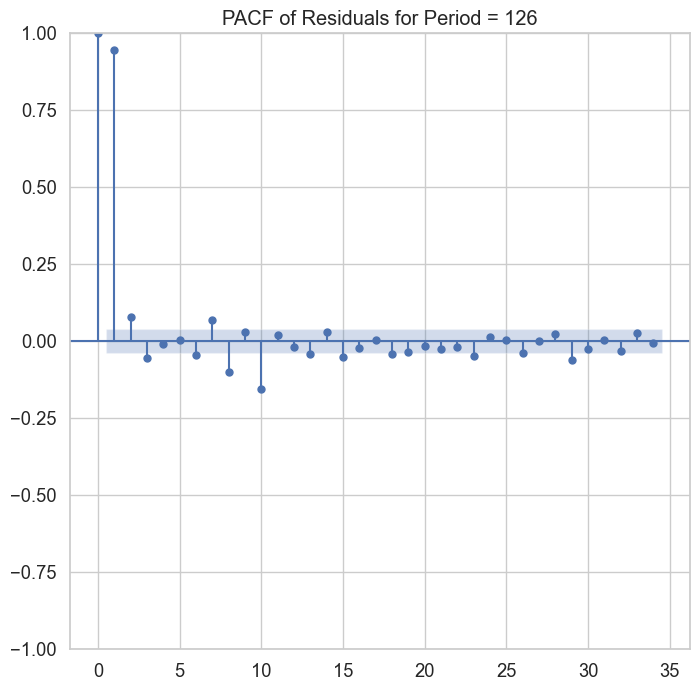

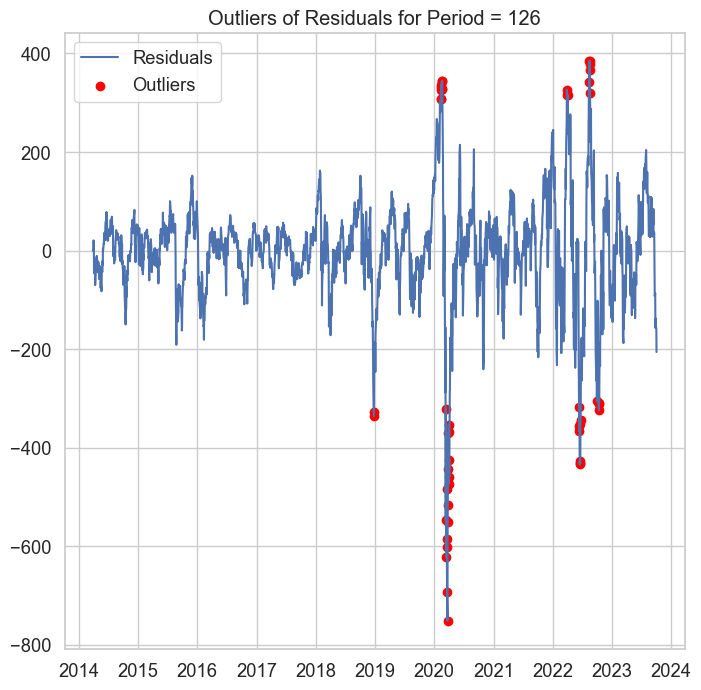

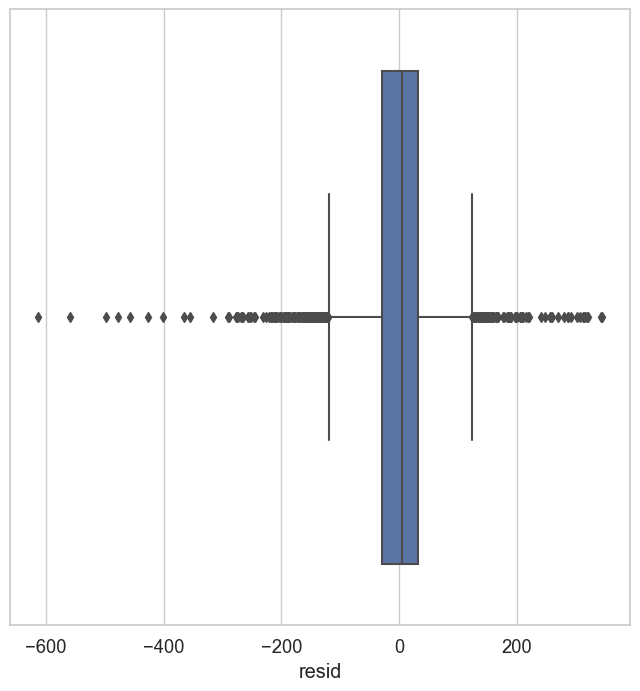

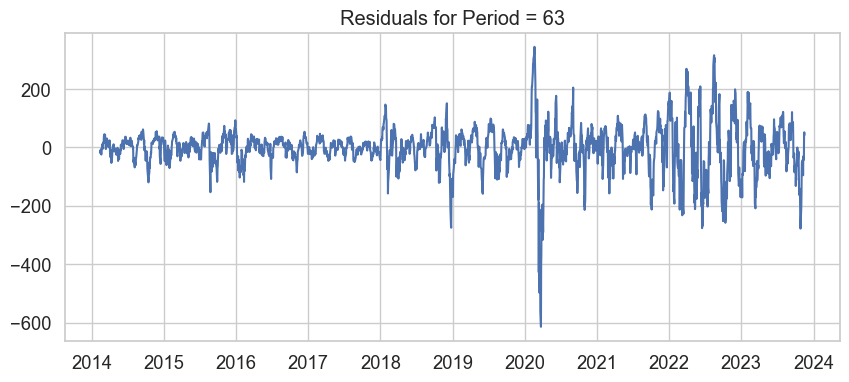

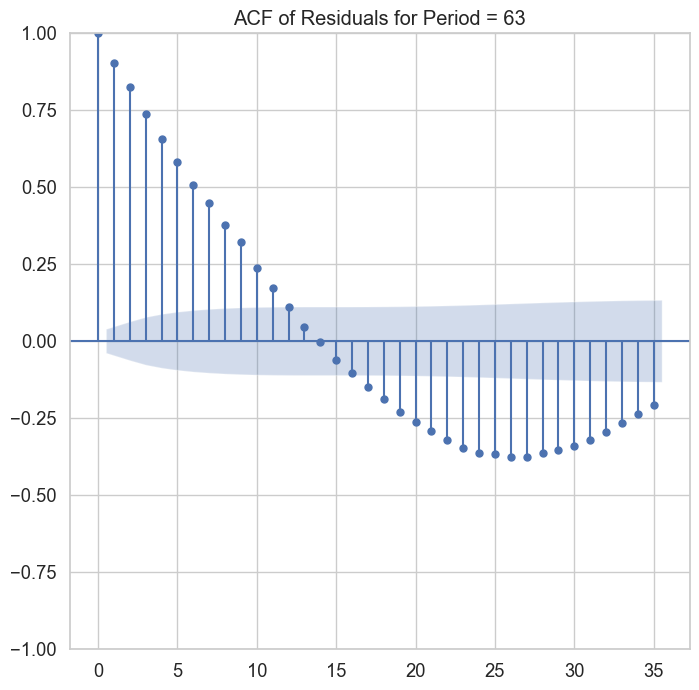

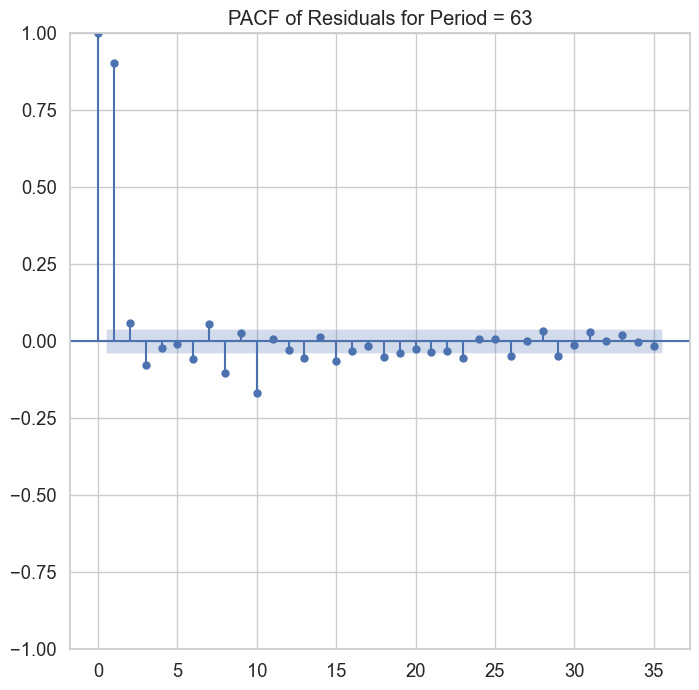

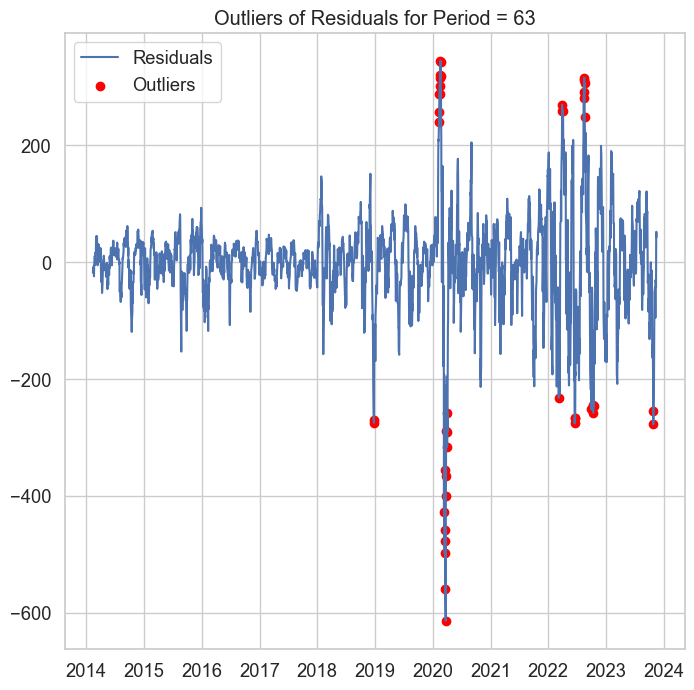

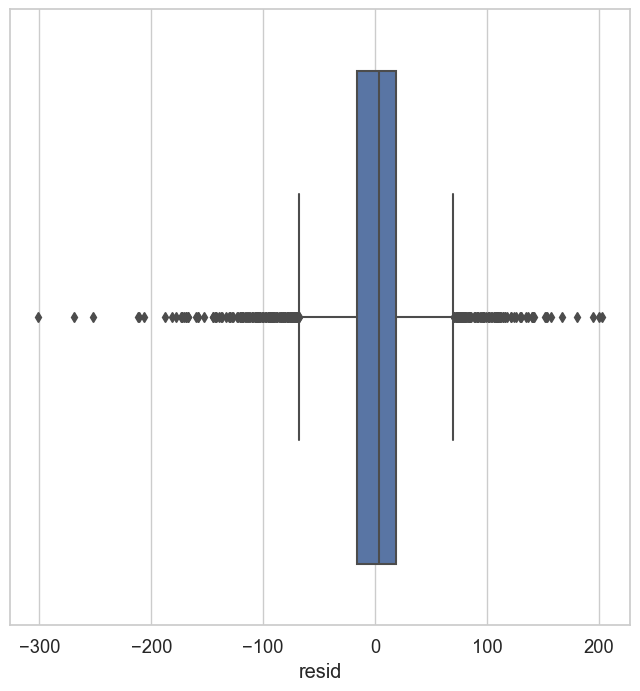

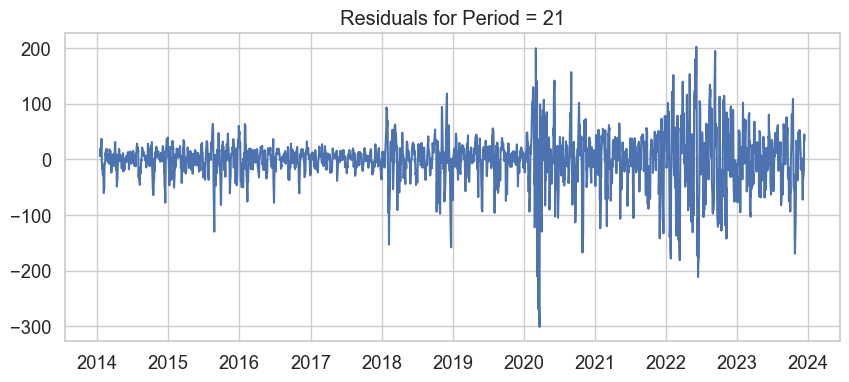

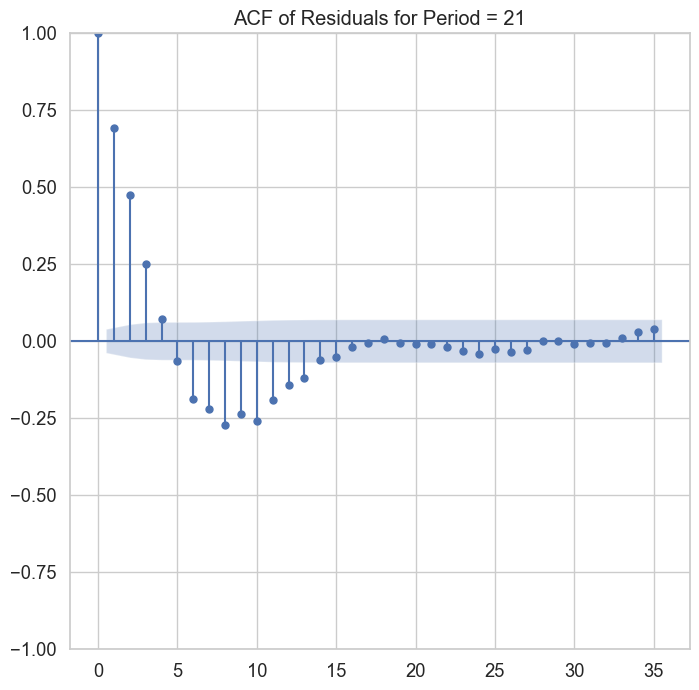

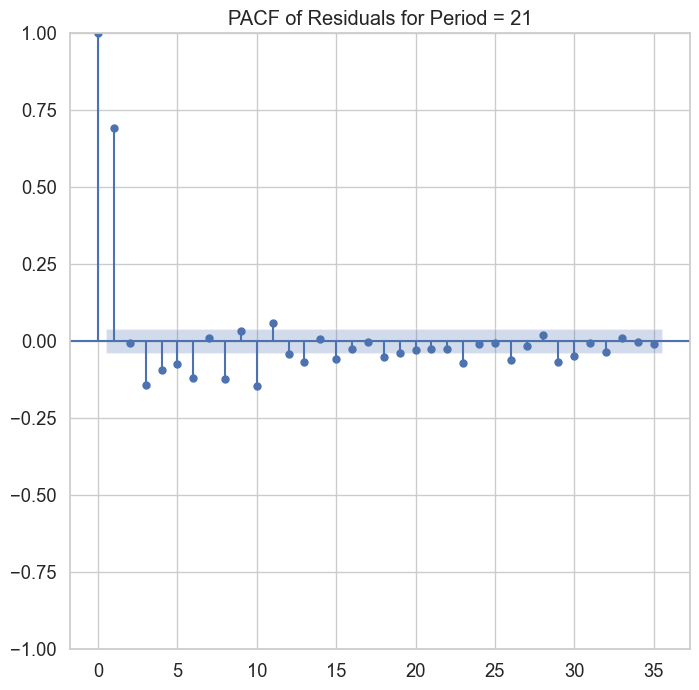

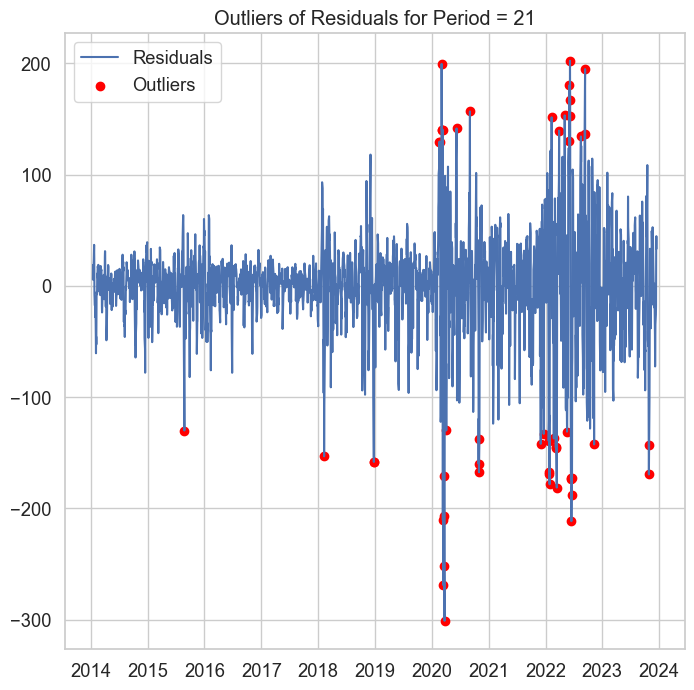

In [17]:
periods = [252, 126, 63, 21]  # Annual, Six months, Quarterly, Monthly

# Function for residual analysis for each period.
for period in periods:
    decomposition = seasonal_decompose(df_BF, model='additive', period=period)
    
    # Analyzing the residuals
    residuals = decomposition.resid.dropna()  # Dropping NA values which are a result of the decomposition process

    # Calculates statistical features. 
    residual_mean = residuals.mean()
    residual_std = residuals.std()

    # Identify potential outliers - points where the residual is more than 3 standard deviations from the mean.
    outliers = residuals[np.abs(residuals - residual_mean) > 3 * residual_std]

    # Create a box plot of the residuals
    sns.boxplot(x=residuals)
    
    # Plot residuals
    plt.figure(figsize=(10, 4))
    plt.plot(residuals)
    plt.title(f'Residuals for Period = {period}')
    plt.show()

    # Autocorrelation plot of residuals
    plot_acf(residuals)
    plt.title(f'ACF of Residuals for Period = {period}')
    plt.show()
    
    # Partial autocorrelation plot of residuals
    plot_pacf(residuals)
    plt.title(f'PACF of Residuals for Period = {period}')
    plt.show()

    # Highlights points that are considered outliers on top of the time series.
    plt.plot(residuals, label='Residuals')
    plt.scatter(outliers.index, outliers, color='red', label='Outliers')
    plt.title(f'Outliers of Residuals for Period = {period}')
    plt.legend()
    plt.show()

#### Interpretation and Analysis of residuals at different periods (Year, Six-Months, Quarter, Month).

#### Boxplot of the residuals.
The boxplot of residuals shows that numerous data points are present on both side of the skewers (strongly indicating the presence of outliers) for all the four periods.

#### ACF.
The ACF residuals shows autocorrelation in all periods, but the quartely (63) period indicates a cyclical pattern. The correlation still remains at ix months (126), showing that future values are still being influenced by past values. However, in a year (252), after 30 lags it enters the interval confidence. 

#### PACF.
All four periods presented a great autocorrelation at the first lag, indicating that in models such as ARIMA, the AutoRegressive parameters of 1 can be a good start. 

#### Ouliers 
The plots shows red dots, which indicates outliers in the residuals, they are easily identified by the high volatility and how clustered they are during 2020, which was because of the Covid pandemic (external shocks).

The implications of this is that the selection of time series models need to be robust against outliers (or they will have to be handled), but also techniques like autoregressive models that can manage auto correlation. The highlighted dots in the last plot also shows that outliers are present in the residuals, thus models will also face volatility. 

<b> techniques to mitigate the impact of outliers? Robust models against outliers? High volatility - GARCH? 

##### Handling outliers - robust scaling? log transformation? Dummy variable?

### Rolling Statistics at different periods

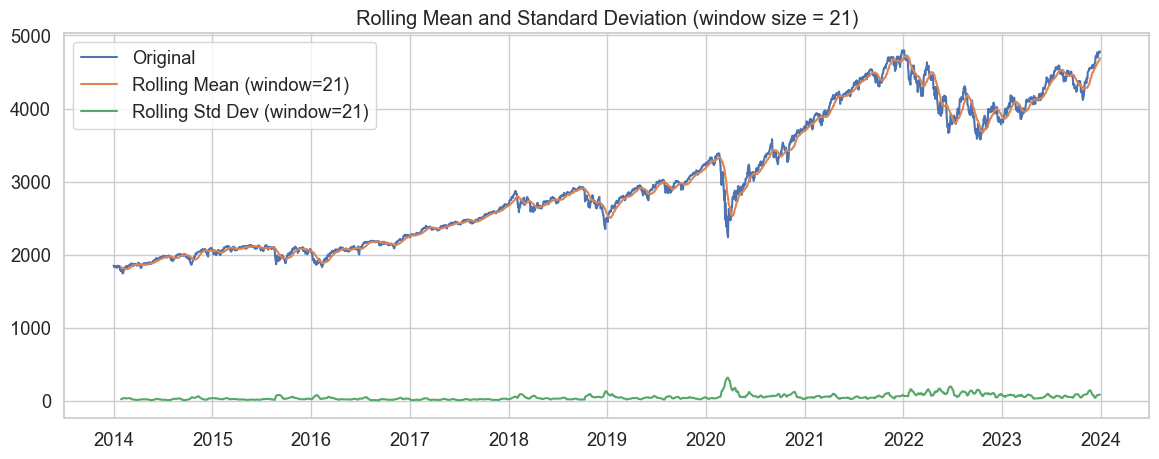

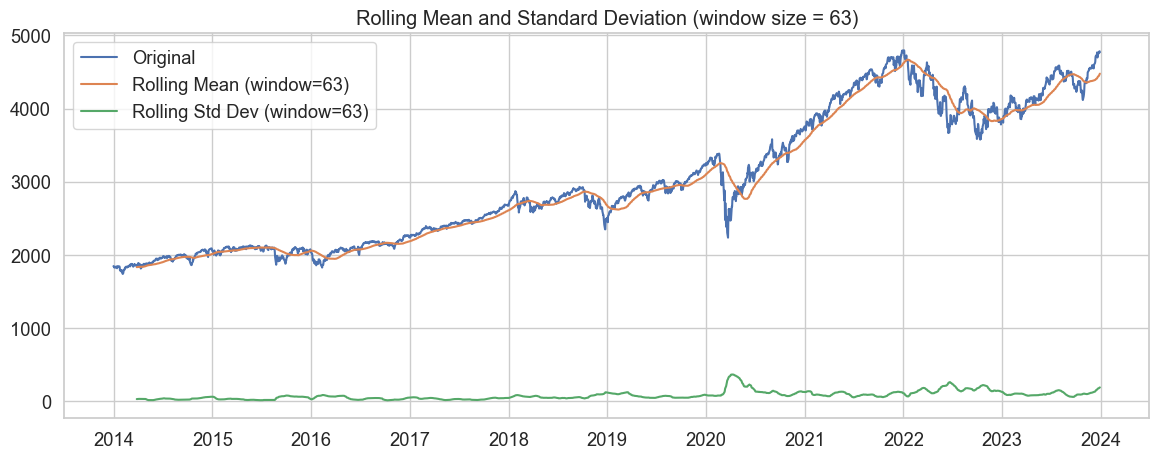

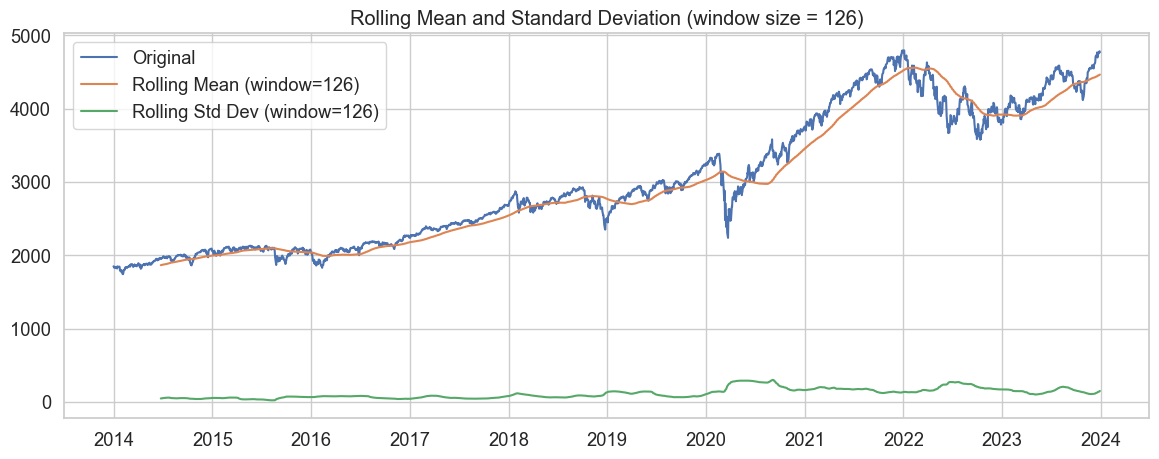

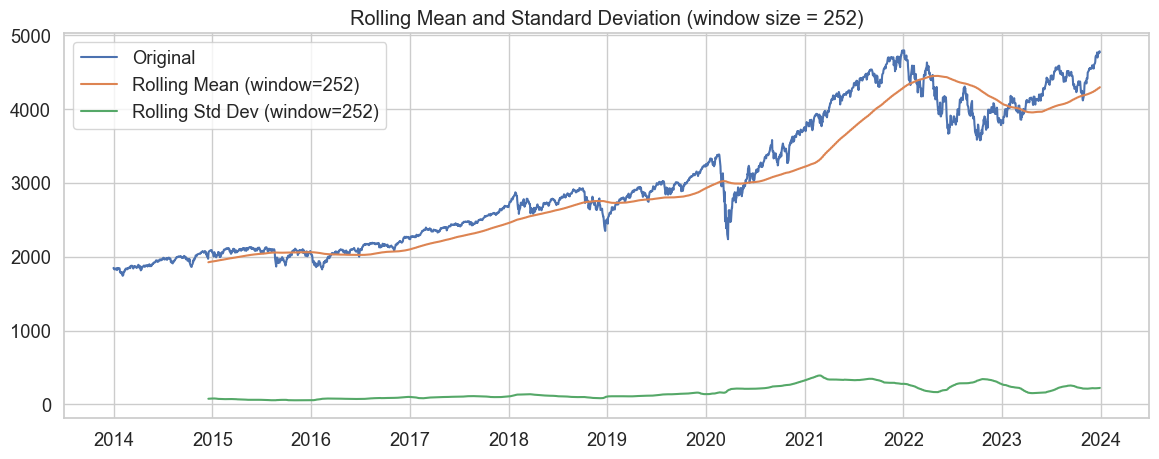

In [18]:
window_sizes = [21, 63, 126, 252]  # A week, a month, a quarter, a yearso  (approximately)
data_close = df_BF  

for window in window_sizes:
    rolling_mean = df_BF.rolling(window=window).mean()
    rolling_std = df_BF.rolling(window=window).std()
    
    plt.figure(figsize=(14, 5))
    plt.plot(df_BF.index, df_BF, label='Original')
    plt.plot(rolling_mean.index, rolling_mean, label=f'Rolling Mean (window={window})')
    plt.plot(rolling_std.index, rolling_std, label=f'Rolling Std Dev (window={window})')
    plt.title(f'Rolling Mean and Standard Deviation (window size = {window})')
    plt.legend()
    plt.show()


- By observing the rolling statistics it is observable that the mean flunctuate over time and the rolling std Dev shows that index present volatility, especially during Covid times.
- Volatility and Flunctuations are more present each time that the window size is decreased.

The analysis of the seasonal decompose indicates that auto-regressive models could be a good start to apply time-series analysis. Due to its auto-correlation, especially at the first lag (parameter indication of AR=1).
However, it is worth to point out that noise/outliers were identified in the residuals. Thus, transformation techniques (i.e.: log, box-cox) could be applied to mitigate the impact of them or apply models that are robust to outliers.  

#### Stationarity 

The autogressive models assumes that the series is stationary and the following lines of code will check this.

In [19]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
adf_result = adfuller(df_BF['Close'])

# Output the results
adf_output = pd.Series(adf_result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key, value in adf_result[4].items():
    adf_output['Critical Value (%s)' % key] = value

# Display the output
print(adf_output)

Test Statistic                   -0.274940
p-value                           0.928979
#Lags Used                       13.000000
Number of Observations Used    2595.000000
Critical Value (1%)              -3.432872
Critical Value (5%)              -2.862654
Critical Value (10%)             -2.567363
dtype: float64


The ADFuller test indicates that the series is not stationary.
- The p-value is greater than 0.05;
- The statistical value also is higher than the critical values.

<b>Therefore, differencing will be performed in order to achieve stationary. This will be the first technique (transformation) to be attempted in the raw data to achieve the optimal model performance.</b> 

In [20]:
# Applying first differencing in the series. 
diff_data = df_BF.diff().dropna()

In [21]:
# Perform Augmented Dickey-Fuller test
adf_result = adfuller(diff_data)

# Output the results
adf_output = pd.Series(adf_result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key, value in adf_result[4].items():
    adf_output['Critical Value (%s)' % key] = value

# Display the output
print(adf_output)

Test Statistic                -1.456877e+01
p-value                        4.665160e-27
#Lags Used                     1.200000e+01
Number of Observations Used    2.595000e+03
Critical Value (1%)           -3.432872e+00
Critical Value (5%)           -2.862654e+00
Critical Value (10%)          -2.567363e+00
dtype: float64


After the first diff, the series suffered major change regarding stationarity. 
- The p-value now is way below the 0.05.
- Also, the statistical value is below (-14.57) in comparison with the critical values (1%, 5% and 10%).

Thus, the ADFuller indicates that the series is stationary. 

Seasonal Decomposition with Period = 252


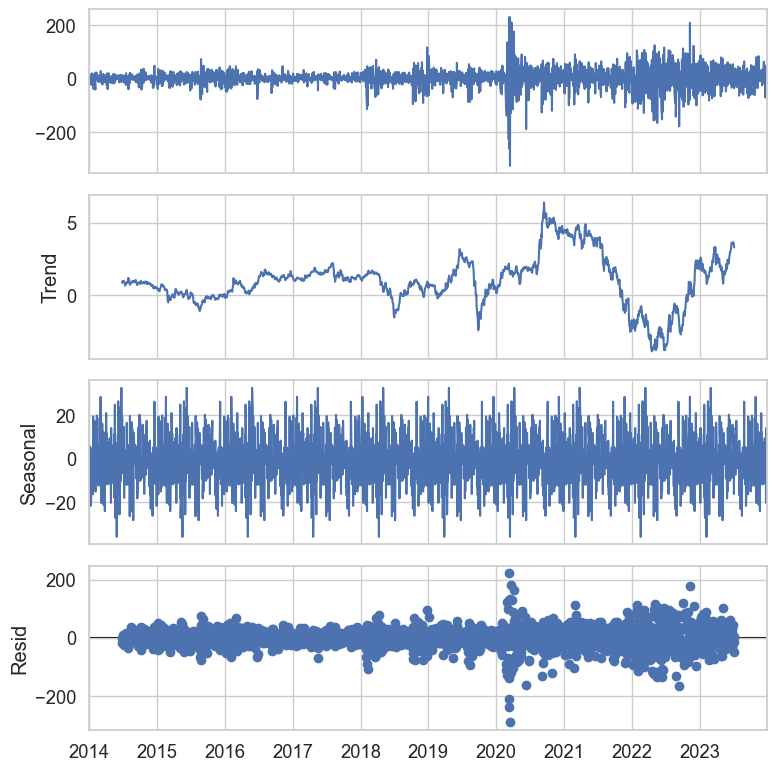

Seasonal Decomposition with Period = 126


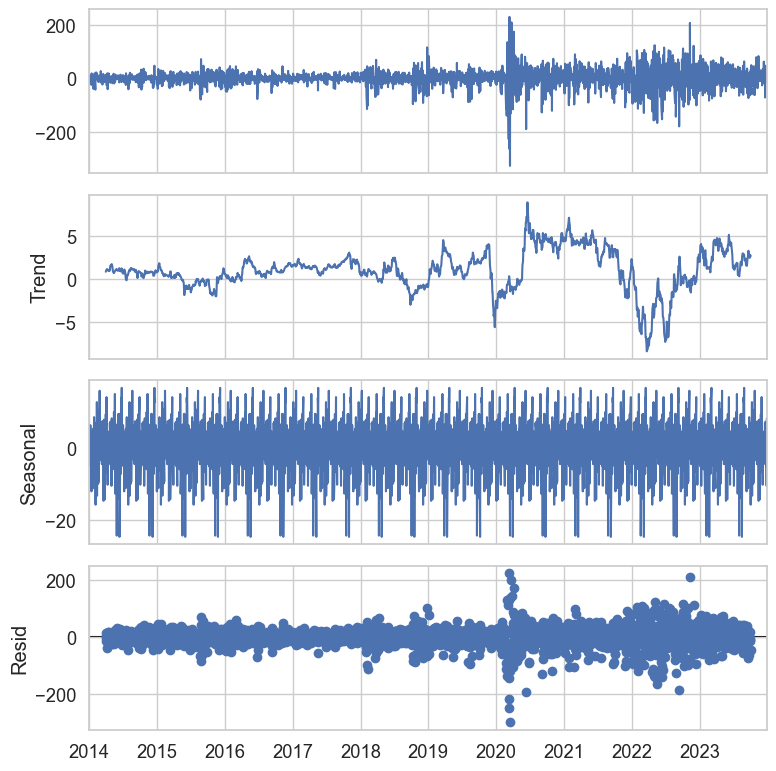

Seasonal Decomposition with Period = 63


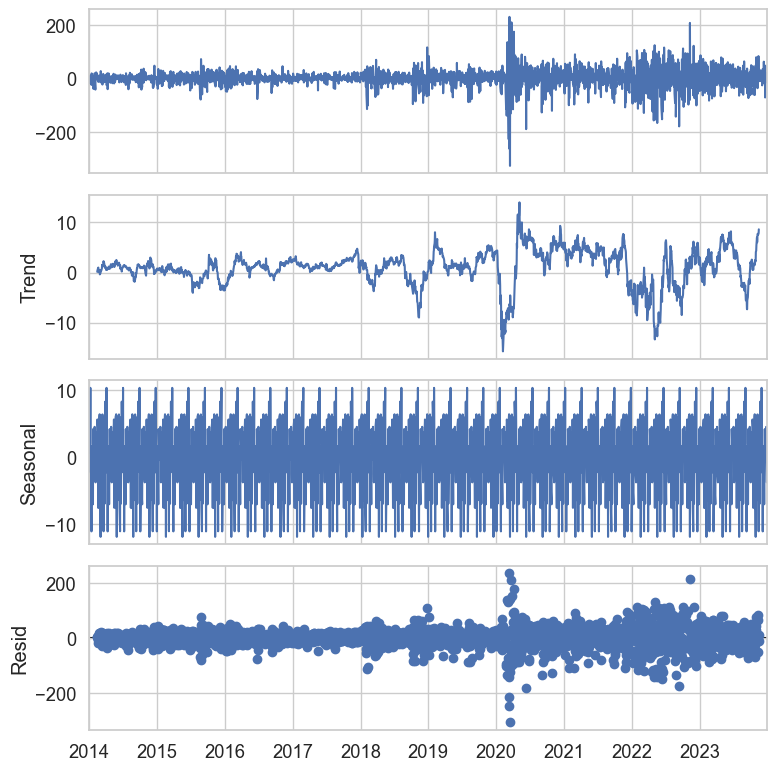

Seasonal Decomposition with Period = 21


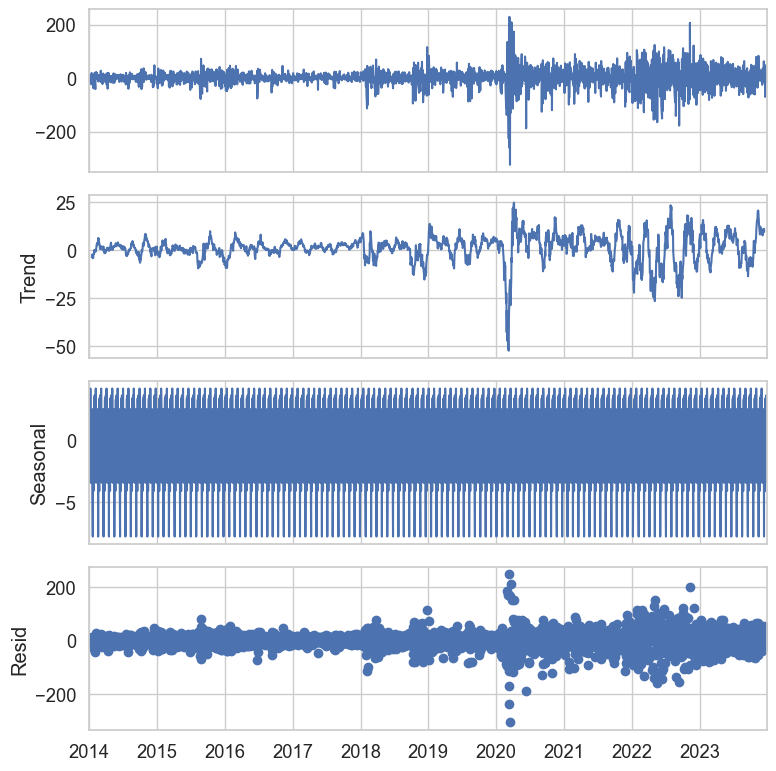

In [22]:
# Seasonal decompositions with different periods.
periods = [252, 126, 63, 21]  # Annual, Six months, Quartely, Monthly (assuming business days)
# Function to generate the plots for all periods.
for period in periods:
    decompositions = seasonal_decompose(diff_data, model='additive', period=period)

    # Plotting the components of the decomposition
    plt.rcParams.update({'figure.figsize': (8,8)})
    print(f"Seasonal Decomposition with Period = {period}")
    decompositions.plot()
    plt.show()

By analysing the seasonal decompose after the differencing it shows that:
- Trend: When comparing with the original values, the trend has been strongly removed, where the data points flunctuate around zero;
- Seasonality: The series still presents some seasonality, with a more irrelugar pattern than the non-diff series. 
- Residuals: Even after the differencing the series still presents noise, however it was substancially reduced. Most of values stays around the mean and no patterns where identified, in contrast with the non-diff series. 

Based on the ADF test and the seasonal decompose, the differencing had a positive effect. But, a few points is worth to consider: 
- Seasonality:
  
Its still present after the diff. Stock Market data could present different types of cycles, it can be weekly, quaterly, annualy. And in this case, SARIMA model might present better performance because it takes into consideration the seasonality. In addition, seasonality diff can also be applied. 

- Residuals:
  
The presence of noise in the plot could impact the models performance, the diff-series might need extra pre-processing stages.
A new modeling, but with transformations (like log or box-cox) can be applied in a later stage to compare the performance with and without the approach to check which one will yield better results.

To continue, a specific period will be selected and based on the following points the quartely period will be chosen. 


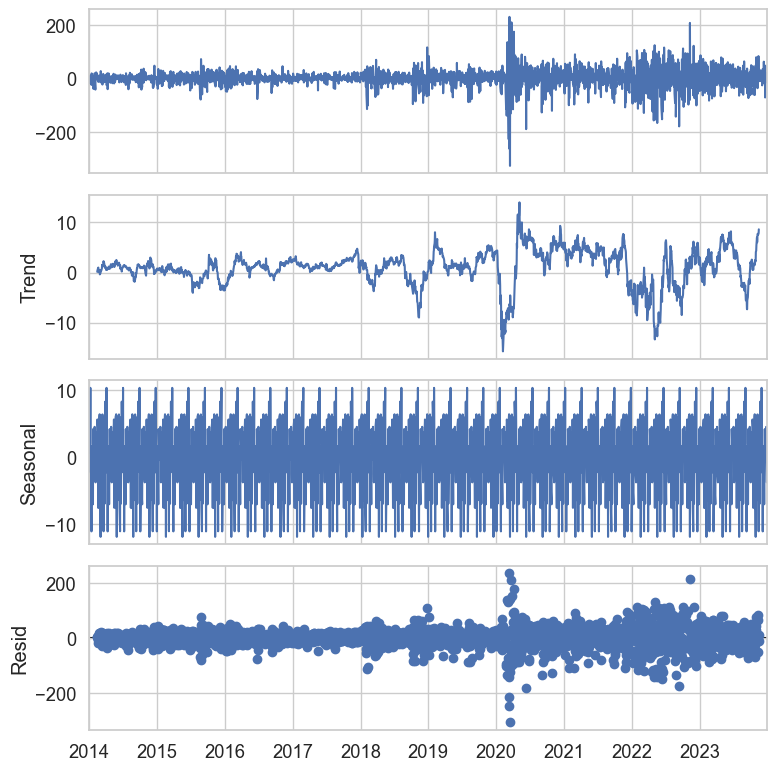

In [23]:
decompositions = seasonal_decompose(diff_data, model='additive', period=63)

# Plotting the components of the decomposition
plt.rcParams.update({'figure.figsize': (8,8)})
decompositions.plot()
plt.show()

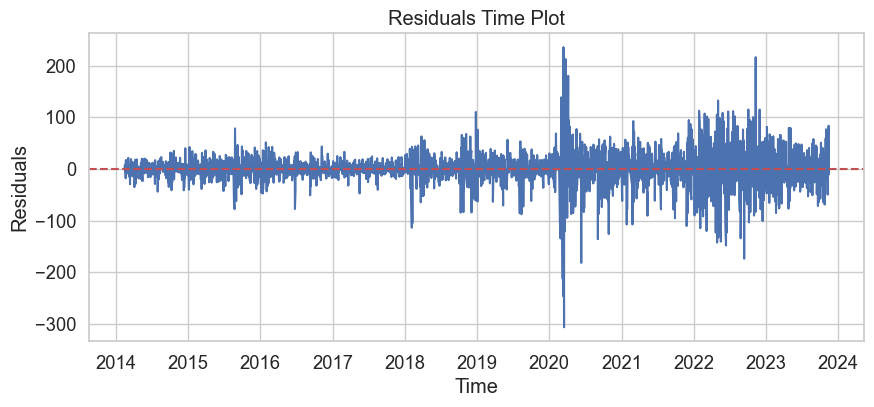

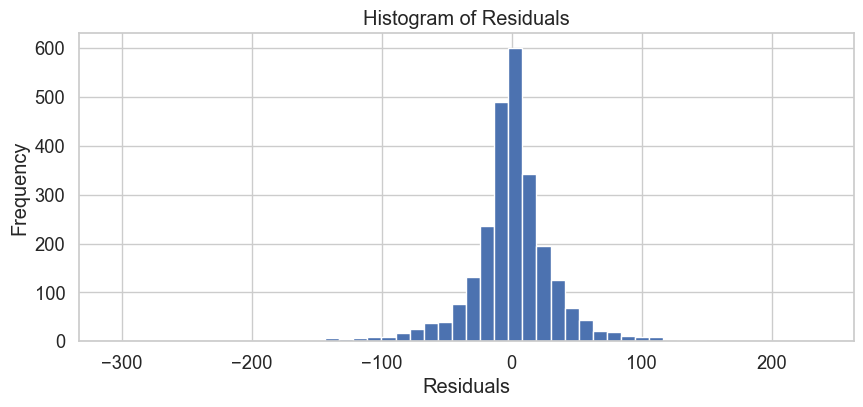

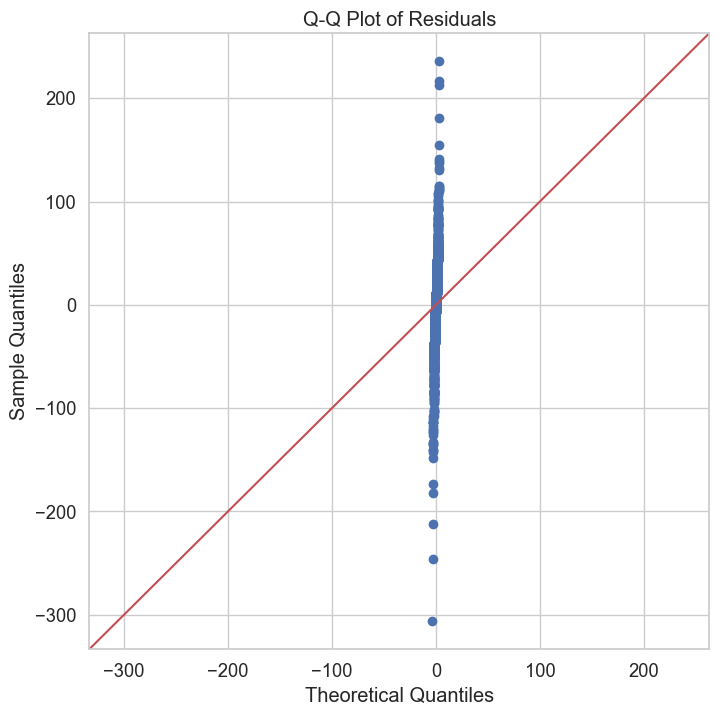

Shapiro-Wilk test statistic: 0.8914386034011841, p-value: 4.281340955202291e-39


In [24]:
import statsmodels.api as sm
from scipy.stats import shapiro

# Perform seasonal decomposition
decompositions = seasonal_decompose(diff_data, model='additive', period=63)

# Access the residual component and dropping nan values. 
residuals = decompositions.resid.dropna()

# Visual Inspection of Residuals: Time plot
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title('Residuals Time Plot')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 4))
plt.hist(residuals, bins=50)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot of residuals
sm.qqplot(residuals, line ='45')
plt.title('Q-Q Plot of Residuals')
plt.show()


# Shapiro-Wilk test for normality
shapiro_test_statistic, shapiro_p_value = shapiro(residuals)
print(f"Shapiro-Wilk test statistic: {shapiro_test_statistic}, p-value: {shapiro_p_value}")

- The residual after the diff does not follow a normal distribution, despite the histogram showing a "bell-shape" distribution. Additional support is observable at the Q-Q plot (numeroos data points not alligned with the red line and Shapiro test (p-value lower than 0.05). 

- In a later stage, if the residuals of the models presents non-normality it could indicate issues with the setting or the model is not capturing all the nuances of the dataset. 

<b> APPLY MODELS WITHOUT TRANSFORMATION AND IF THERE'S NON-NORMALITY AND OTHER FEATURES IN THE RESIDUALS OF THE MODEL, YES APPLY TRANSFORMATIONS TO HANDLE OUTLIERS, THE "RAW" COULD BECOME BENCHMARK. </b>

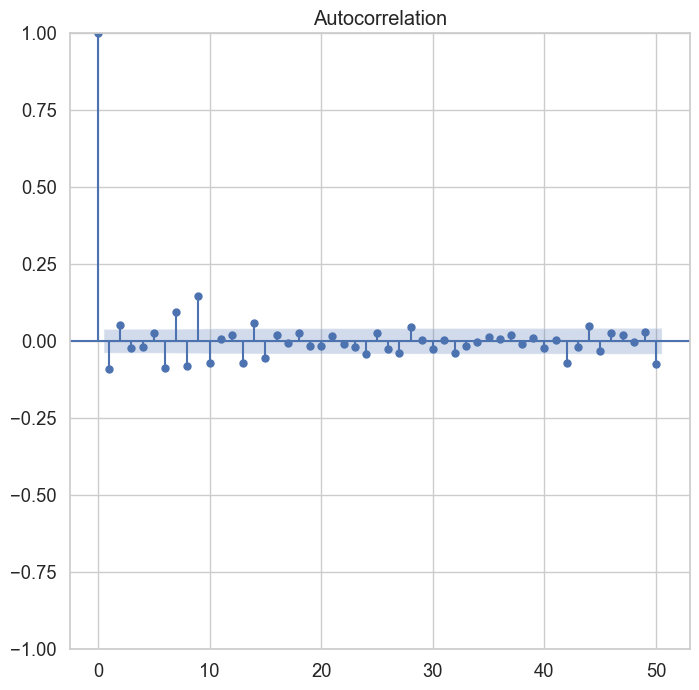

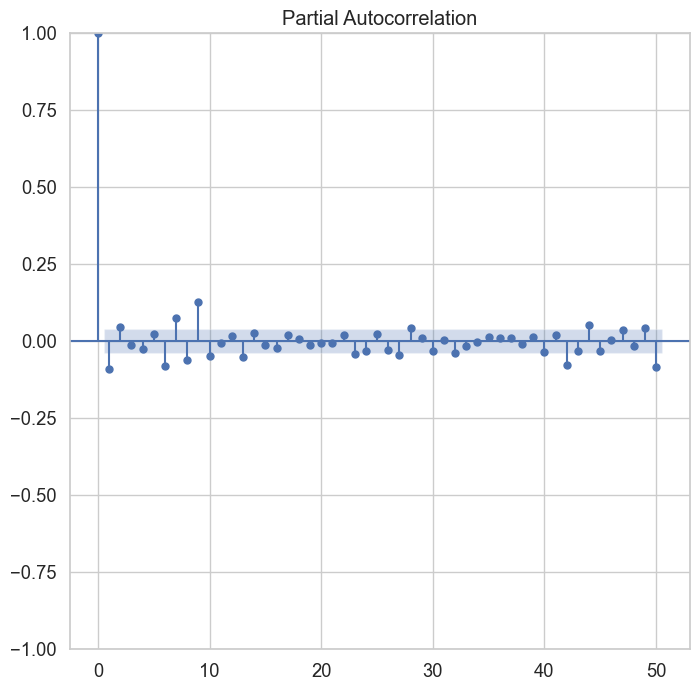

In [25]:
# ACF and PACF to check autocorrelation and initial parameters for the auto regressive models.

# Plot ACF
plot_acf(diff_data, lags=50)  # You can adjust the number of lags as needed
plt.show()

# Plot PACF
plot_pacf(diff_data, lags=50)  # You can adjust the number of lags as needed
plt.show()


According to the ACF and PACF plots after applying differencing.

ACF: 
- The degree of correlation decreases when the number of lag increase. 
- Also the huge spike at the first lag and abruptly decreasing, shows strong correlation with the previous value.
- Using 50 lags, there no huge spikes apart from the first lag, possibly indicating that moving average parameter may not be needed. 

PACF: 
- It indicates a significant decrease after the first lag, thus the (AR = 1) is a good starting point.

By observing the diff S&P 500 index, the parameters autoregressive model ARIMA could be set as (1,0,0) and them tunned for better performance. 
AR (1) - Showed in the previous plots where the PACF pointed a huge spike at lag 1.
I  (0) - The integrated parameter (differencing) is set to zero because the dataset "achieved" stationary after the first diff.
MA (0) - No other huge spike were identified in the plots, thus moving average is set to zero. 

Obs.: The parameters at (1,0,0) is the first parameter to be attempted and will be followed by hyper-paramenter tunning. 

### AutoRegressive (AR) Models 

Throught the S&P500 index analysis, the series presented a high correlation at a first lag and autoregressive models are suitable. However, the index presented other features that could potentially influence the models performance. 
- Volatility;
- Noise / Outliers;
- Non-stationarity;
- Linear and Non-Linear;
Thus, to perform the AR techniques, feature engineering approaches will be applied to mitigate the impact of them.   

##### The first attempt using ARIMA is using the differencing approach to follow models assumption (stationary).

The train and test sets will be set as 90 and 10. The low limit for test is due to the number of observations (around 2500), which is not a long series.

In [47]:
# Splitting the dataset (90/10)
split_ratio = 0.9 # or whatever ratio is deemed appropriate
split_index = int(len(diff_data) * split_ratio)

train = diff_data[:split_index]
test = diff_data[split_index:]


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2347
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -11622.353
Date:                Thu, 28 Mar 2024   AIC                          23250.706
Time:                        18:32:42   BIC                          23267.989
Sample:                    01-01-2014   HQIC                         23257.001
                         - 12-29-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8525      0.665      1.282      0.200      -0.450       2.156
ar.L1         -0.1068      0.009    -11.734      0.000      -0.125      -0.089
sigma2      1172.0984     15.066     77.800      0.0

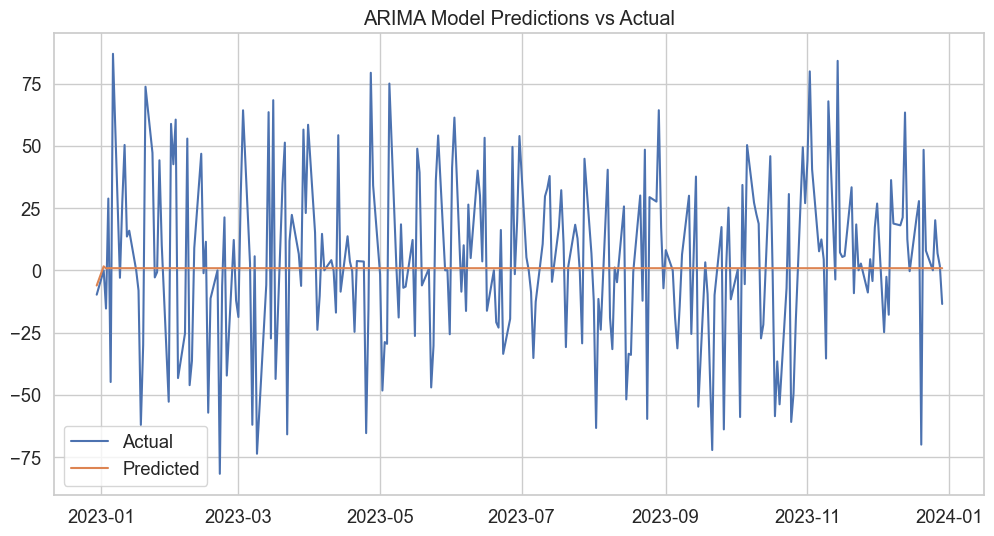

MSE: 1151.0688384291368
RMSE: 33.927405418468666
MAE: 26.216000177593987


In [48]:
from statsmodels.tsa.ar_model import AutoReg # Imports Auto Regressive
from sklearn.metrics import mean_squared_error, mean_absolute_error # Imports metrics for evaluation.
from scipy import stats # Stats is for Shapiro test (normality).
from statsmodels.tsa.arima.model import ARIMA # ARIMA time series model.
from statsmodels.tsa.statespace.sarimax import SARIMAX# Imports SARIMA
import itertools # For hyper-parameter tunning.
import pmdarima as pm # Imports pmdarima to find optimal order values.
from pmdarima import auto_arima # Imports auto_arima for optimal parameters.

# Fit an ARIMA(1,0,0) model based on ACF and PACF plot analysis.
model = ARIMA(train, order=(1, 0, 0))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Make predictions
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)

# Plot the actual values vs. the predictions
plt.figure(figsize=(12, 6))
plt.plot(test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('ARIMA Model Predictions vs Actual')
plt.legend()
plt.show()

# Calculate and print out the error metrics
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, predictions)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

In [49]:
# Fit the auto_arima model
model = pm.auto_arima(diff_data, start_p=0, start_d=0, start_q=0, max_p=5, max_d=3, max_q=5, seasonal=False, stepwise=True, suppress_warnings=True, error_action="ignore", trace=True)

# Print the best model's AIC
print(f'Best ARIMA model by auto_arima: {model} with AIC: {model.aic()}')

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=25856.719, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=25836.594, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=25838.519, Time=0.21 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=25833.277, Time=0.15 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=25834.892, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=25835.110, Time=0.29 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=25834.259, Time=0.22 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=25836.068, Time=0.59 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=25832.229, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=25835.259, Time=0.16 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=25833.764, Time=0.21 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=25834.043, Time=0.44 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=25833.050, Time=0.55 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=25834.742, Time=1.18 sec

Best model:  ARIMA

In [50]:
import itertools
import warnings
from statsmodels.tsa.arima.model import ARIMA



# Define the p, d, q parameters to take values between 0 and 3
p = d = q = range(0, 4)

# Generate all different combinations of p, d, and q triplets
pdq = list(itertools.product(p, d, q))

best_aic = float('inf')
best_pdq = None
best_model = None

warnings.filterwarnings('ignore')  # Ignore warnings

for param in pdq:
    try:
        temp_model = ARIMA(diff_data, order=param)
        results = temp_model.fit()
        
        # Compare this model's AIC to the best (lowest) AIC so far
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
            best_model = results
    except:  # Handle cases where the parameter combination is not valid
        continue

print(f'Best ARIMA{best_pdq} model AIC: {best_aic}')

Best ARIMA(2, 1, 3) model AIC: 25766.90446647218


Using the index along with the differencing approach did not yield good results. It was manually attempted many orders, but all of them resulted and poor results. Therefore, there is a strong indication that the model is not capturing the nuances of the series. 

##### Log Returns.

Next transformation approach that is going to be performed is the log return. 
The technique is appropriate and worth to try due to: 
- Volatility, which is very clear during Covid.
- Is well suitable for time series, the approach will use compounded rate of return overtime.
- Stationarity, the transformation could also affect the trend.  

In [63]:
# Applying log return in S&P 500 index.
logreturn_data = np.log(df_BF['Close'] / df_BF['Close'].shift(1))

In [64]:
# Because of the log return, the first row of the log will be NaN Value, thus dropping the first row to continue with the analysis.
logreturn_data = logreturn_data.dropna()

In [65]:
# Perform Augmented Dickey-Fuller test
adf_result = adfuller(logreturn_data)

# Output the results
adf_output = pd.Series(adf_result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key, value in adf_result[4].items():
    adf_output['Critical Value (%s)' % key] = value

# Display the output
print(adf_output)

Test Statistic                -1.477709e+01
p-value                        2.275338e-27
#Lags Used                     1.200000e+01
Number of Observations Used    2.595000e+03
Critical Value (1%)           -3.432872e+00
Critical Value (5%)           -2.862654e+00
Critical Value (10%)          -2.567363e+00
dtype: float64


According to the ADF test the log index return is likely to be stationary.
- The test statistic value is way below the critical values.
- The p-value is way below the 0.05

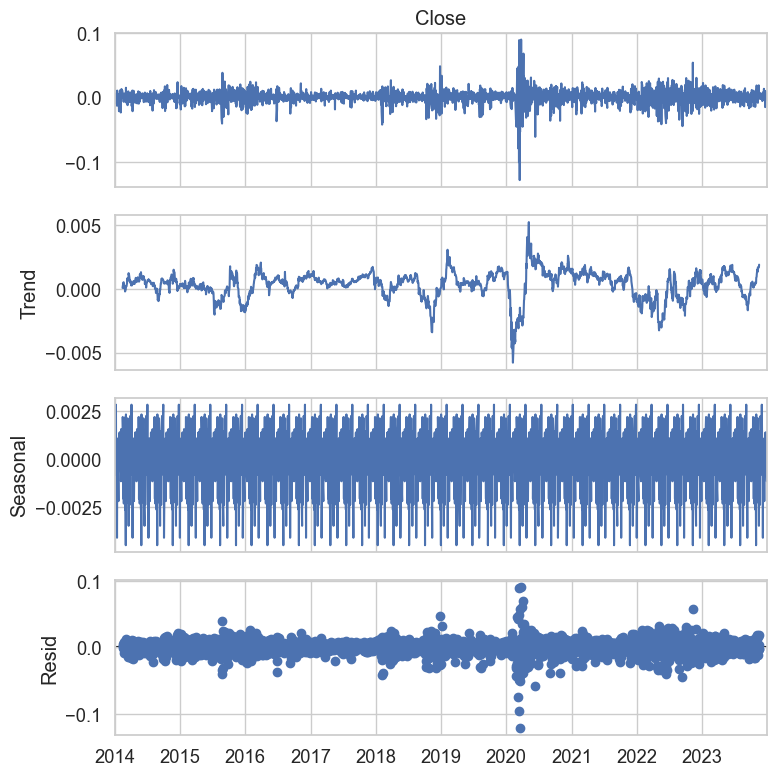

In [67]:
decompositions = seasonal_decompose(logreturn_data, model='additive', period=63)

# Plotting the components of the decomposition
plt.rcParams.update({'figure.figsize': (8,8)})
decompositions.plot()
plt.show()

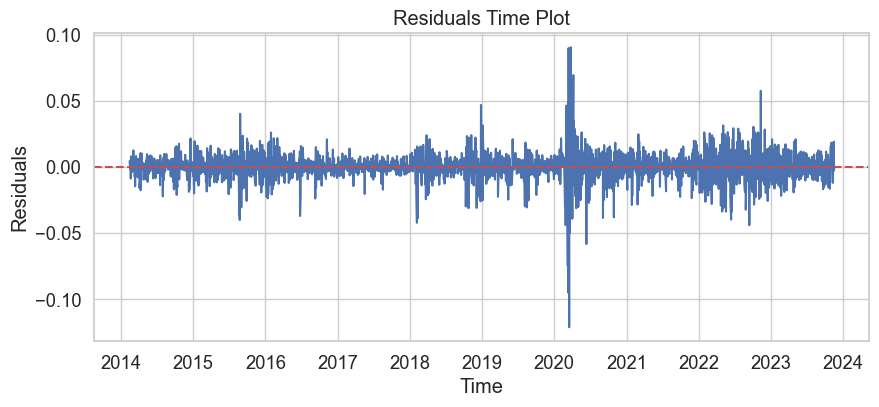

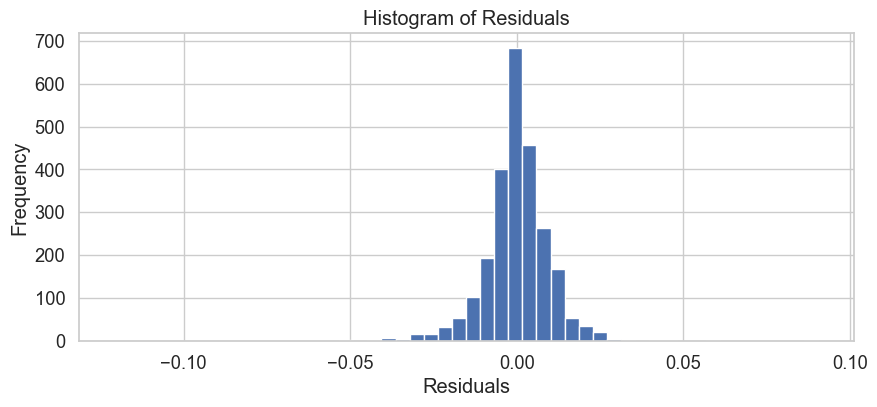

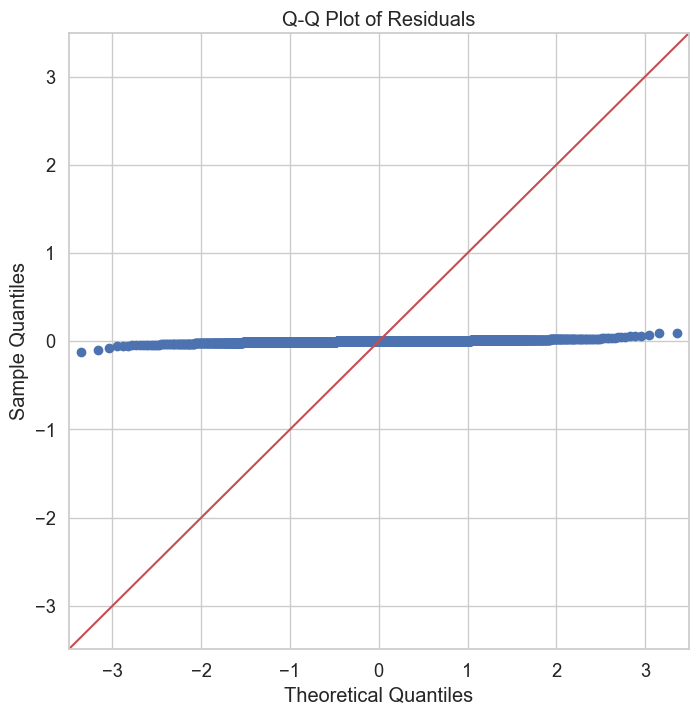

Shapiro-Wilk test statistic: 0.8757042288780212, p-value: 4.2584059032366866e-41


In [68]:
# Perform seasonal decomposition
decompositions = seasonal_decompose(logreturn_data, model='additive', period=63)

# Access the residual component and dropping nan values. 
residuals = decompositions.resid.dropna()

# Visual Inspection of Residuals: Time plot
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title('Residuals Time Plot')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 4))
plt.hist(residuals, bins=50)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot of residuals
sm.qqplot(residuals, line ='45')
plt.title('Q-Q Plot of Residuals')
plt.show()


# Shapiro-Wilk test for normality
shapiro_test_statistic, shapiro_p_value = shapiro(residuals)
print(f"Shapiro-Wilk test statistic: {shapiro_test_statistic}, p-value: {shapiro_p_value}")

In [ ]:
# ACF and PACF to check autocorrelation and initial parameters for the auto regressive models.

# Plot ACF
plot_acf(logreturn_data, lags=50)  # You can adjust the number of lags as needed
plt.show()

# Plot PACF
plot_pacf(logreturn_data, lags=50)  # You can adjust the number of lags as needed
plt.show()

### Finding different modes in the distribution, ask David how do 

##### As showed in the data distribution (multimodal), the following codes will attempt to identify the modals in the dataset.

- The attempt will be performced through DBSCAN.

In [ ]:
df_BF2 = df_BF.copy()

# Setting variables for DBSCAN.
rolling_window_size = 21  # Adjust the window size as 21, it capture more nuances of the data based on the previous plots.
features = np.column_stack([
    df_BF2['Close'].rolling(window=rolling_window_size).mean(), # Extracting the mean.
    df_BF2['Close'].rolling(window=rolling_window_size).std() # Extracting the std Dev.
])

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scaling the features for the model.
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features[rolling_window_size-1:])  # Cutting off NaNs from rolling.


In [ ]:
from sklearn.cluster import DBSCAN

# These parameters were attempted few times, but still need tunning.
dbscan = DBSCAN(eps=0.25, min_samples=5) # The lower the number the more sensitive it gets.
clusters = dbscan.fit_predict(scaled_features)


In [ ]:
df_BF2 = df_BF2.iloc[rolling_window_size-1:]
df_BF2['cluster'] = clusters # creating a column cluster for identification.

<b> EPS AND MIN_SAMPLES HAVE TO BE REAJUSTED THE PLOT SHOWS THAT THE CLUSTERING IS STILL WRONG, RANDOM CLUSTERS OVERTIME. 

In [ ]:
plt.figure(figsize=(14, 7))
# Plot the core samples
for cluster in set(clusters):
    if cluster == -1:
        continue  
    core_samples_mask = np.zeros_like(clusters, dtype=bool)
    core_samples_mask[dbscan.core_sample_indices_] = True
    plt.plot(df_BF2.index[core_samples_mask & (clusters == cluster)], 
             df_BF2['Close'][core_samples_mask & (clusters == cluster)], 
             'o', label=f'Cluster {cluster}')

# Plot the outliers
plt.plot(df_BF2.index[clusters == -1], df_BF2['Close'][clusters == -1], 'k+', label='Noise')

plt.legend()
plt.title('DBSCAN Clustering of S&P500 Index')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.show()


##### Clustering using Kmeans

In [ ]:
from sklearn.preprocessing import StandardScaler

df_BF1 = df_BF.copy()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_BF1)

In [ ]:
from sklearn.cluster import KMeans

# Assuming there are 3 clusters (based on histogram)??? Can be tunned 
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_features)

# The cluster assignments for each data point
clusters = kmeans.labels_


In [ ]:
df_BF1['cluster'] = clusters

plt.figure(figsize=(14, 7))
for cluster in set(clusters):
    plt.plot(df_BF1.index[df_BF1['cluster'] == cluster], df_BF1['Close'][df_BF1['cluster'] == cluster], label=f'Cluster {cluster}')

plt.legend()
plt.title('S&P500 Index Segmented by Clusters')
plt.show()


- The test indicates that the data is not stationary, thus differencing (or a different approach) will be required to perform autoregressive models.

Obs.: To perform auto regressive models, differencing will have to be applied to met models requirements.

#### Feature Engineering - Calculating S&P 500 index Lags and Return

Objectives:
Due to the complexity of the data, presenting trend, seasonality, outliers This section will attempt to improve models performance. 

Creating Lag feature daily (1) and weekly(5);
- Due to the business frequency days in the dataset the weeekly is 5 instead of 7.
- The dataset has around 2600 observations, which is not a large dataset, thus data loss generated by the shifting is taken into account and not creating larger lags.

A copy of the dataframe will be created for the second lag (5). 

In [ ]:
# Copy of the dataframe to shift for a weef of trading (5)
df_lag_5 = df_BF.copy()

# First trading day lag.
df_BF['lag_1'] = df_BF['Close'].shift(1)

# A week of trading 
df_lag_5['lag_5']  = df_lag_5['Close'].shift(5)

display(df_BF)

In [ ]:
# Drop the rows with NaN values that were introduced by shifting
df_BF.dropna(inplace=True)
display(df_BF)

- Daily lag created.
- NaN value generated also dropped. 

In [ ]:
df_lag_5.dropna(inplace=True)
display(df_lag_5)

- Same path for the df including the weekly lag.

Next line of codes will check the correlation between the Close Index value with the daily lag and weekly lag. 

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_BF.corr()

# Display the correlation matrix
print(correlation_matrix)

In [ ]:
# Scatter plot for Lag 1 Day vs. Close Price
plt.figure(figsize=(10, 6))
plt.scatter(df_BF['lag_1'], df_BF['Close'], alpha=0.5)
plt.title('Lag 1 Day vs. Close Index')
plt.xlabel('Lag 1 Day')
plt.ylabel('Close Index')
plt.show()

Observable at the strong correlation at the first lag in PACF, the correlation so as the scatter plot shows a strong linear relationship between them.

Obs.: Caution for Overfitting.

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_lag_5.corr()

# Display the correlation matrix
print(correlation_matrix)

In [ ]:
# Scatter plot for Lag 1 Day vs. Close Price
plt.figure(figsize=(10, 6))
plt.scatter(df_lag_5['lag_5'], df_lag_5['Close'], alpha=0.5)
plt.title('Lag 5 Day vs. Close Index')
plt.xlabel('Lag 5 Day')
plt.ylabel('Close Index')
plt.show()

- Both of lags presents a very strong linear relationship, indicating that linear models or techniques that can capture, could also be an option.

<b> a variable that can be applied in the model later on? 

In [ ]:
aaa

In [ ]:
# This cell calculates the index return based on the close value and will drop the first row (resulting in nan value)

# Calculate daily stock returns
df_BF['daily_stock_return'] = df_BF['Close'].pct_change()

# Drop rows with NaN values
df_BF.dropna(inplace=True)

# Displays the dataset with the new column (the stock returns).
display(df_BF)

In [ ]:
# Calculate the minimum and maximum values in the column
min_value = df_BF['daily_stock_return'].min()
max_value = df_BF['daily_stock_return'].max()

# Print the minimum and maximum values
print("Minimum value:", min_value)
print("Maximum value:", max_value)

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_BF['daily_stock_return'], bins=20, kde=True, color='blue')
plt.title('Distribution of S&P500 stock return')
plt.xlabel('S&P500 Index Return')
plt.ylabel('Frequency')
plt.show()

- After performing feature engineering, the new feature index return indicates a normal distribution, making previous techniques to identify outliers appropriate. 

In [ ]:
Q1 = df_BF['daily_stock_return'].quantile(0.25)
Q3 = df_BF['daily_stock_return'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df_BF['daily_stock_return'][(df_BF['daily_stock_return'] < lower_bound) | (df_BF['daily_stock_return'] > upper_bound)]

# Check if there are outliers
if outliers.empty:
    print("No outliers detected.")
else:
    print("Outliers detected:")
    print(outliers)

In [ ]:
# Detect outliers using Z-score method
z_scores = stats.zscore(df_BF['daily_stock_return'])
outliers = (z_scores > 3) | (z_scores < -3)
outlier_indices = df_BF.index[outliers]
print('Outlier indices:', outlier_indices)


In [ ]:
plt.figure(figsize=(12, 8)) # Set up the plot and adjust the figure size.
sns.set(style="whitegrid", font_scale=1.2) # Add a whitegrid in the backgound for clear visualization.
# Creates the boxplot with all the columns.
ax = sns.boxplot(data=df_BF['daily_stock_return'], width=0.5) # Sets the width to 0.5
 # Add labels and ha argument used to align the labels to the designated boxplot.
ax.set_xlabel('index returna') # Adds x-axis label.
ax.set_ylabel('Value') # Adds y-axis label.
ax.set_title('Boxplot of S&P500 index return (10 years)') # Sets title to tle boxplot.

By analysing the outliers of return:
- The IQR shows that 206 outliers are present.
- The Z-score also accused the presence of outliers.
-The boxplot also showed numerous data points outside of the skewers.


In [ ]:
# Plotting
plt.figure(figsize=(12, 8))

# Time Series Plot of Close Price
plt.plot(df_BF.index, df_BF['daily_stock_return'], color='blue')
plt.title('S&P 500 index return Over Time')
plt.xlabel('Date')
plt.ylabel('index return')

plt.show()

- The lineplot of the index return had a significant change, it does not have a trend anymore and visually it looks even more appropriate for time-series approaches. 